# How many documents/links (in English) the Microsoft Documentation Webpage have?

In [1]:
import cfscrape
from lxml import etree
import pandas as pd

In [2]:
scraper = cfscrape.create_scraper()
header = {'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9',
          'Accept-Encoding': 'gzip, deflate, sdch',
          'Accept-Language' : 'nl-NL,nl;q=0.8,en-US;q=0.6,en;q=0.4',
          'Cache-Control' : 'max-age=0',
          'Connection': 'keep-alive',
          'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.81 Safari/537.36'}

## Defining the initial URL and the number of levels to search for URLs

In [3]:
df = pd.DataFrame({'url': ["https://docs.microsoft.com/en-us/"]})
df_totest = pd.DataFrame({'url': ["https://docs.microsoft.com/en-us/"]})
df_cache = pd.DataFrame({'url': ["https://docs.microsoft.com/en-us/"]})

level = 8

In [7]:
df_totest = df

## Running a loop to search for URL in Websites

In [ ]:
for x in range(level):
    
    print("LEVEL:",x)
    
    for url in df_totest['url']:
        print(url)
        try:
            scraped_html=scraper.get(url,headers=header).content
            html = etree.HTML(scraped_html)
            df_temp = pd.DataFrame(html.xpath("//a/@href"), columns=['url']).drop_duplicates()
            df_temp['url'] = df_temp['url'].apply(lambda x: 'https://docs.microsoft.com'+x if x.startswith('/') else x)
            df_temp = df_temp[df_temp['url'].str.contains('docs.microsoft.com/en-us')].drop_duplicates().dropna()
            print(len(df_temp))
            df_cache = df_cache.append(df_temp, ignore_index=True).drop_duplicates().dropna()
        except:
            print("error!")
            next
    
    df_totest = df_cache[~df_cache.isin(df)].drop_duplicates().dropna()
    df = df.append(df_totest,ignore_index=True)
    print(len(df))

LEVEL: 0
https://docs.microsoft.com/en-us/
87
https://docs.microsoft.com/en-us/learn/
10
https://docs.microsoft.com/en-us/samples/browse/
7
https://docs.microsoft.com/en-us/windows/
11
https://docs.microsoft.com/en-us/azure/
48
https://docs.microsoft.com/en-us/visualstudio/products/
17
https://docs.microsoft.com/en-us/office/
40
https://docs.microsoft.com/en-us/microsoft-365/
9
https://docs.microsoft.com/en-us/dotnet/
32
https://docs.microsoft.com/en-us/aspnet/core/
30
https://docs.microsoft.com/en-us/sql/
25
https://docs.microsoft.com/en-us/enterprise-mobility-security/
7
https://docs.microsoft.com/en-us/surface/
8
https://docs.microsoft.com/en-us/dynamics365/
45
https://docs.microsoft.com/en-us/xamarin/
13
https://docs.microsoft.com/en-us/azure/devops/
15
https://docs.microsoft.com/en-us/system-center/
37
https://docs.microsoft.com/en-us/powershell/
7
https://docs.microsoft.com/en-us/graph/
28
https://docs.microsoft.com/en-us/education/
7
https://docs.microsoft.com/en-us/gaming/
8
ht

7
https://docs.microsoft.com/en-us/microsoftteams
22
https://docs.microsoft.com/en-us/DeployOffice/plan-microsoft-365-apps
7
https://docs.microsoft.com/en-us/DeployOffice/mac
7
https://docs.microsoft.com/en-us/DeployOffice/office2019
7
https://docs.microsoft.com/en-us/DeployOffice
12
https://docs.microsoft.com/en-us/sharepoint/sharepoint-server
7
https://docs.microsoft.com/en-us/sharepoint/sharepoint-online
11
https://docs.microsoft.com/en-us/sharepoint/hybrid/hybrid
7
https://docs.microsoft.com/en-us/powershell/sharepoint
16
https://docs.microsoft.com/en-us/sharepoint
14
https://docs.microsoft.com/en-us/onedrive/onedrive
8
https://docs.microsoft.com/en-us/onedrive
10
https://docs.microsoft.com/en-us/Exchange/exchange-online
9
https://docs.microsoft.com/en-us/office/exchange
15
https://docs.microsoft.com/en-us/project-for-the-web/projectforweb-admin-home
7
https://docs.microsoft.com/en-us/Project
12
https://docs.microsoft.com/en-us/office365/planner/planner-admin-home
8
https://docs.mi

7
https://docs.microsoft.com/en-us/dynamics365/mixed-reality/product-visualize/index
7
https://docs.microsoft.com/en-us/learn/browse/?products=dynamics-psa
7
https://docs.microsoft.com/en-us/dynamics365/mixed-reality/remote-assist/index
15
https://docs.microsoft.com/en-us/dynamics365/sales-enterprise/help-hub
8
https://docs.microsoft.com/en-us/learn/browse/?resource_type=learning path&products=dynamics-sales
7
https://docs.microsoft.com/en-us/dynamics365/ai/sales/overview
7
https://docs.microsoft.com/en-us/learn/browse/?resource_type=learning path&products=dynamics-sales-insights
7
https://docs.microsoft.com/en-us/dynamics365/sales-professional/help-hub
7
https://docs.microsoft.com/en-us/learn/browse/?resource_type=learning path&products=dynamics-sales&term=sales professional
7
https://docs.microsoft.com/en-us/dynamics365/supply-chain/index
7
https://docs.microsoft.com/en-us/learn/browse/?products=dynamics-scm
7
https://docs.microsoft.com/en-us/dynamics365/talent/talent-welcome
8
https

7
https://docs.microsoft.com/en-us/biztalk/core/scenarios-for-business-solutions
7
https://docs.microsoft.com/en-us/biztalk/core/trading-partner-management-using-biztalk-server
7
https://docs.microsoft.com/en-us/biztalk/adapters-and-accelerators/adapters-and-accelerators-in-biztalk-server
7
https://docs.microsoft.com/en-us/biztalk/core/using-adapters
7
https://docs.microsoft.com/en-us/biztalk/adapters-and-accelerators/biztalk-adapter-pack
7
https://docs.microsoft.com/en-us/biztalk/adapters-and-accelerators/fileact-interact/microsoft-biztalk-server-fileact-and-interact-adapters-documentation
7
https://docs.microsoft.com/en-us/biztalk/adapters-and-accelerators/accelerator-rosettanet/microsoft-biztalk-accelerator-for-rosettanet-documentation
7
https://docs.microsoft.com/en-us/biztalk/adapters-and-accelerators/accelerator-swift/microsoft-biztalk-accelerator-for-swift-documentation
7
https://docs.microsoft.com/en-us/biztalk/dev-center/his-biztalk-adapters
7
https://docs.microsoft.com/en-us/

7
https://docs.microsoft.com/en-us/advertising/hotel-service/code-examples
7
https://docs.microsoft.com/en-us/dvertising/hotel-service/reference
7
https://docs.microsoft.com/en-us/advertising/scripts/
10
https://docs.microsoft.com/en-us/advertising/scripts/get-started
7
https://docs.microsoft.com/en-us/advertising/scripts/concepts/authorization
7
https://docs.microsoft.com/en-us/advertising/scripts/guides/single-account-access
7
https://docs.microsoft.com/en-us/advertising/scripts/guides/multi-account-access
7
https://docs.microsoft.com/en-us/advertising/scripts/examples/
7
https://docs.microsoft.com/en-us/advertising/scripts/reference-overview
8
https://docs.microsoft.com/en-us/deployedge/microsoft-edge-channels
7
https://docs.microsoft.com/en-us/deployedge/edge-ie-mode
10
https://docs.microsoft.com/en-us/deployedge/microsoft-edge-video-deploy
7
https://docs.microsoft.com/en-us/configmgr/apps/deploy-use/deploy-edge
11
https://docs.microsoft.com/en-us/intune/apps/apps-edge-macos
8
http

7
https://docs.microsoft.com/en-us/Office365/Kaizala/kaizala-overview
8
https://docs.microsoft.com/en-us/kaizala/partnerdocs/customerticketingsolution
7
https://docs.microsoft.com/en-us/kaizala/partnerdocs/integratekaizalaandmailflow
8
https://docs.microsoft.com/en-us/kaizala/partnerdocs/securityoverview
7
https://docs.microsoft.com/en-us/kaizala/developer-platform
7
https://docs.microsoft.com/en-us/intune-education/what-is-intune-for-education
7
https://docs.microsoft.com/en-us/intune-education/whats-new-in-edu
7
https://docs.microsoft.com/en-us/enterprise-mobility-security/solutions/ems-govt-service-description
7
https://docs.microsoft.com/en-us/microsoft-365/enterprise/
17
https://docs.microsoft.com/en-us/microsoft-365/enterprise/deploy-foundation-infrastructure
7
https://docs.microsoft.com/en-us/azure/active-directory/users-groups-roles/
11
https://docs.microsoft.com/en-us/azure/active-directory/authentication/
7
https://docs.microsoft.com/en-us/azure/active-directory/devices/
7
ht

7
https://docs.microsoft.com/en-us/nuget/reference/dotnet-commands
16
https://docs.microsoft.com/en-us/nuget/reference/nuget-exe-cli-reference
7
https://docs.microsoft.com/en-us/nuget/consume-packages/package-references-in-project-files
8
https://docs.microsoft.com/en-us/nuget/reference/msbuild-targets
7
https://docs.microsoft.com/en-us/nuget/reference/nuspec
8
https://docs.microsoft.com/en-us/nuget/reference/nuget-config-file
7
https://docs.microsoft.com/en-us/nuget/api/overview
8
https://docs.microsoft.com/en-us/nuget/policies/governance
7
https://docs.microsoft.com/en-us/nuget/nuget-org/policies/data-requests
7
https://docs.microsoft.com/en-us/nuget/release-notes/known-issues
7
https://docs.microsoft.com/en-us/nuget/resources/nuget-faq
11
https://docs.microsoft.com/en-us/nuget/nuget-org/nuget-org-faq
9
https://docs.microsoft.com/en-us/office365/enterprise/
7
https://docs.microsoft.com/en-us/DeployOffice/deployment-guide-for-office-365-proplus
8
https://docs.microsoft.com/en-us/offic

8
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/optimistic-concurrency
16
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/best-practices/work-with-data
7
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/metadata-services
7
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/browse-your-metadata
16
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/entity-metadata
16
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/entity-attribute-metadata
54
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/entity-relationship-metadata
10
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/best-practices/work-with-metadata
7
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/plug-ins
9
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/workflow/workflow-extensions
42
https:/

7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/about/
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/troubleshooting
7
https://docs.microsoft.com/en-us/windows-server/administration/performance-tuning/role/windows-server-container/
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/quick-start/quick-start-windows-10
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/quick-start/quick-start-windows-server
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/samples#Application-Frameworks
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/samples#programing-languages
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/samples#databases
7
https://docs.microsoft.com/en-us/virtualization/windowscontainers/samples#infrastructure-and-ci-tools
7
https://docs.microsoft.com/en-us/virtualization/hyper-v-on-windows/about/
7
https://docs.microsoft.com/en-us/virtualization/hype

7
https://docs.microsoft.com/en-us/previous-versions/mim/
7
https://docs.microsoft.com/en-us/previous-versions/microsoft-robotics/
7
https://docs.microsoft.com/en-us/previous-versions/office/
84
https://docs.microsoft.com/en-us/previous-versions/msp-n-p/
7
https://docs.microsoft.com/en-us/previous-versions/powershell/scripting/overview
8
https://docs.microsoft.com/en-us/previous-versions/system-center/
7
https://docs.microsoft.com/en-us/previous-versions/technet-magazine/
7
https://docs.microsoft.com/en-us/previous-versions/windows/
62
https://docs.microsoft.com/en-us/learn/certifications/roles/developer
7
https://docs.microsoft.com/en-us/learn/certifications/roles/administrator
7
https://docs.microsoft.com/en-us/learn/certifications/roles/solutions-architect
7
https://docs.microsoft.com/en-us/learn/certifications/roles/data-engineer
7
https://docs.microsoft.com/en-us/learn/certifications/roles/data-scientist
7
https://docs.microsoft.com/en-us/learn/certifications/roles/ai-engineer
7
h

7
https://docs.microsoft.com/en-us/windows-server/failover-clustering/failover-clustering-overview
7
https://docs.microsoft.com/en-us/windows-server/manage/system-insights/overview
7
https://docs.microsoft.com/en-us/windows-server/administration/performance-tuning/
7
https://docs.microsoft.com/en-us/windows-server/administration/manage-windows-server
8
https://docs.microsoft.com/en-us/windows-server/networking/what-s-new-in-networking
7
https://docs.microsoft.com/en-us/windows-server/networking/sdn/
15
https://docs.microsoft.com/en-us/windows-server/networking/sdn/technologies/network-controller/network-controller
7
https://docs.microsoft.com/en-us/windows-server/networking/networking
8
https://docs.microsoft.com/en-us/windows-server/remote/remote-desktop-services/welcome-to-rds
7
https://docs.microsoft.com/en-us/windows-server/remote/remote-desktop-services/clients/remote-desktop-clients
7
https://docs.microsoft.com/en-us/windows-server/remote/remote-desktop-services/clients/remote-de

9
https://docs.microsoft.com/en-us/azure/hdinsight/hadoop/apache-hadoop-linux-create-cluster-get-started-portal
7
https://docs.microsoft.com/en-us/azure/machine-learning/data-science-virtual-machine/dsvm-ubuntu-intro
7
https://docs.microsoft.com/en-us/azure/storage/common/storage-introduction
24
https://docs.microsoft.com/en-us/azure/cosmos-db/introduction
7
https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python
22
https://docs.microsoft.com/en-us/azure/postgresql/quickstart-create-server-database-portal
7
https://docs.microsoft.com/en-us/azure/mysql/quickstart-create-mysql-server-database-using-azure-portal
7
https://docs.microsoft.com/en-us/azure/cosmos-db/create-sql-api-python
7
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-connect-query-python
13
https://docs.microsoft.com/en-us/azure/storage/queues/storage-queues-introduction
7
https://docs.microsoft.com/en-us/azure/service-bus-messaging
8
https://docs.microsoft.com/en-us/azure/even

7
https://docs.microsoft.com/en-us/powershell/scripting/overview
8
https://docs.microsoft.com/en-us/azure/virtual-machines/virtual-machines-linux-powershell-samples?toc=/powershell/azure/toc.json
7
https://docs.microsoft.com/en-us/azure/app-service-web/app-service-powershell-samples?toc=/powershell/azure/toc.json
7
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-powershell-samples?toc=/powershell/azure/toc.json
11
https://docs.microsoft.com/en-us/learn/modules/automate-azure-tasks-with-powershell/
7
https://docs.microsoft.com/en-us/powershell/module/?view=azps-2.7.0
7
https://docs.microsoft.com/en-us/powershell/azure/active-directory/
9
https://docs.microsoft.com/en-us/powershell/azure/service-fabric/
8
https://docs.microsoft.com/en-us/powershell/azure/elasticdbjobs/
8
https://docs.microsoft.com/en-us/azure/app-service/scripts/cli-deploy-github?toc=%2fcli%2fazure%2ftoc.json
13
https://docs.microsoft.com/en-us/azure/postgresql/quickstart-create-server-up-azure-cli?toc=%

7
https://docs.microsoft.com/en-us/smallbusiness
7
https://docs.microsoft.com/en-us/article/empower-your-small-business-with-remote-work-9b91a85a-39b4-40a6-a590-0f9bea0ba8e6
7
https://docs.microsoft.com/en-us/learn/paths/m365-manage-team-collaboration/
7
https://docs.microsoft.com/en-us/learn/certifications/courses/browse
7
https://docs.microsoft.com/en-us/learn/browse/?products=m365&roles=administrator
7
https://docs.microsoft.com/en-us/learn/browse/?products=m365&roles=business-user
7
https://docs.microsoft.com/en-us/learn/browse/?products=m365%2Cms-graph&roles=developer
7
https://docs.microsoft.com/en-us/learn/browse/?products=m365&roles=functional-consultant
7
https://docs.microsoft.com/en-us/learn/browse/?products=m365&resource_type=learning%20path
7
https://docs.microsoft.com/en-us/learn/browse/?products=m365&resource_type=module
7
https://docs.microsoft.com/en-us/learn/certifications
21
https://docs.microsoft.com/en-us/iis/extensions/introduction-to-iis-express/iis-express-overv

24
https://docs.microsoft.com/en-us/azure/visual-studio/vs-storage-aspnet5-getting-started-blobs
24
https://docs.microsoft.com/en-us/azure/visual-studio/vs-storage-cloud-services-getting-started-blobs
7
https://docs.microsoft.com/en-us/azure/visual-studio/vs-storage-webjobs-what-happened
50
https://docs.microsoft.com/en-us/azure/storage/
50
https://docs.microsoft.com/en-us/dotnet/api/overview/azure/storage?view=azure-dotnet
17
https://docs.microsoft.com/en-us/azure/storage/blobs/data-lake-storage-known-issues
18
https://docs.microsoft.com/en-us/azure/storage/common/storage-quickstart-create-account
27
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.storage.cloudstorageaccount
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.storage.blob.cloudblobclient
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.storage.blob.cloudblobcontainer
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.storage.blob.cloudblockblob
8
https://docs.microsoft.com

9
https://docs.microsoft.com/en-us/sql/sql-server/install/instance-configuration?view=sql-server-ver15#maxdop
9
https://docs.microsoft.com/en-us/analysis-services/tabular-models/calculation-groups
7
https://docs.microsoft.com/en-us/analysis-services/tabular-models/query-interleaving
7
https://docs.microsoft.com/en-us/analysis-services/tabular-models/relationships-ssas-tabular
7
https://docs.microsoft.com/en-us/analysis-services/server-properties/memory-properties
7
https://docs.microsoft.com/en-us/analysis-services/server-properties/general-properties
7
https://docs.microsoft.com/en-us/analysis-services/what-s-new-in-sql-server-analysis-services#online-attach
11
https://docs.microsoft.com/en-us/sql/sql-server/sql-server-get-help
8
https://docs.microsoft.com/en-us/sql/azure-data-studio/quickstart-sql-database?toc=/azure/sql-database/toc.json
12
https://docs.microsoft.com/en-us/sql/connect/ado-net/microsoft-ado-net-sql-server
9
https://docs.microsoft.com/en-us/sql/connect/jdbc/microsoft-

18
https://docs.microsoft.com/en-us/azure/devops/report/dashboards/analytics-extension
10
https://docs.microsoft.com/en-us/azure/devops/marketplace/install-extension?toc=/azure/devops/server/toc.json&bc=/azure/devops/server/breadcrumb/toc.json
8
https://docs.microsoft.com/en-us/azure/devops/marketplace/approve-extensions?toc=/azure/devops/server/toc.json&bc=/azure/devops/server/breadcrumb/toc.json
7
https://docs.microsoft.com/en-us/azure/devops/marketplace/assign-paid-extensions?toc=/azure/devops/server/toc.json&bc=/azure/devops/server/breadcrumb/toc.json
8
https://docs.microsoft.com/en-us/azure/devops/marketplace/how-to/grant-permissions?toc=/azure/devops/server/toc.json&bc=/azure/devops/server/breadcrumb/toc.json
8
https://docs.microsoft.com/en-us/azure/devops/marketplace/uninstall-disable-extensions?toc=/azure/devops/server/toc.json&bc=/azure/devops/server/breadcrumb/toc.json
12
https://docs.microsoft.com/en-us/azure/devops/pipelines/policies/retention?toc=/azure/devops/server/toc.j

7
https://docs.microsoft.com/en-us/system-center/sma/authoring-automation-runbooks
7
https://docs.microsoft.com/en-us/system-center/sma/architecture-of-service-management-automation
7
https://docs.microsoft.com/en-us/system-center/vmm/plan-overview
7
https://docs.microsoft.com/en-us/system-center/vmm/install
8
https://docs.microsoft.com/en-us/system-center/vmm/cloud-create
7
https://docs.microsoft.com/en-us/system-center/vmm/manage-networks
7
https://docs.microsoft.com/en-us/system-center/vmm/manage-storage
7
https://docs.microsoft.com/en-us/system-center/vmm/deploy-guarded-host-fabric
8
https://docs.microsoft.com/en-us/system-center/vmm/deploy-sdn
7
https://docs.microsoft.com/en-us/system-center/spf/overview
7
https://docs.microsoft.com/en-us/system-center/spf/plan-deployment
7
https://docs.microsoft.com/en-us/system-center/spf/deploy-spf
7
https://docs.microsoft.com/en-us/system-center/spf/upgrade
17
https://docs.microsoft.com/en-us/powershell/systemcenter/systemcenter2016/dataprotec

12
https://docs.microsoft.com/en-us/graph/api/teamstab-add?view=graph-rest-1.0
9
https://docs.microsoft.com/en-us/graph/api/teamsappinstallation-add?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/group-post-events?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/team-archive?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/group-delete?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/resources/team?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/resources/teamstab?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/channel-post-messages?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/resources/teamsapp?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/resources/teams-api-overview?view=graph-rest-1.0
19
https://docs.microsoft.com/en-us/graph/api/resources/communications-api-overview?view=graph-rest-beta
24
https://docs.microsoft.com/en-us/graph/api/resou

11
https://docs.microsoft.com/en-us/graph/api/connectorgroup-post-members?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/connectorgroup-list-members?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/connectorgroup-update?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/connectorgroup-delete?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/onpremisespublishing?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/onpremisespublishingsinglesignon?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/verifiedcustomdomaincertificatesmetadata?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/kerberossignonsettings?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/onpremisesagent?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/onpremisesagentgroup?view=graph-rest-beta
7
https://docs.micro

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-manageddevice?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowswifienterpriseeapconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-hardwareinformation?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-retirescheduledmanageddevice?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-configurationusage?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-shared-deviceenrollmenttype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-manageddeviceremoteaction?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-mam-managedbrowsertype?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-mam-androidmana

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androiddeviceownerenterprisewificonfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androiddeviceownervpnconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-shared-devicemanagement?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicecompliancepolicysettingstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-deviceconfigurationsettingstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-iosazureadsinglesignonextension?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-manageddevicemobileappconfigurationsettingstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-shared-policyplatformtype?v

7
https://docs.microsoft.com/en-us/graph/api/intune-enrollment-deponboardingsetting-generateencryptionpublickey?view=graph-rest-beta?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/resources/intune-enrollment-deponboardingsetting?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-reporting-devicemanagementreports-getsettingnoncompliancereport?view=graph-rest-beta?view=graph-rest-beta
8
https://docs.microsoft.com/en-uso:getRemediationSummary:Collection(microsoft.graph.deviceHealthScript?view=graph-rest-beta)?view=graph-rest-beta
0
https://docs.microsoft.com/en-uso:createMigrationReport:Collection(microsoft.graph.groupPolicyMigrationReport?view=graph-rest-beta)?view=graph-rest-beta
0
https://docs.microsoft.com/en-us/graph/api/resources/intune-gpanalyticsservice-grouppolicymigrationreport?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-devicemanagementautopilotevent?view=graph-rest-beta
7
https://do

8
https://docs.microsoft.com/en-us/graph/api/intune-devices-devicehealthscript-enableglobalscripts
8
https://docs.microsoft.com/en-us/graph/api/intune-troubleshooting-user-getmanageddeviceswithfailedorpendingapps
8
https://docs.microsoft.com/en-us/graph/api/resources/intune-shared-user
7
https://docs.microsoft.com/en-us/graph/api/intune-devices-devicehealthscript-areglobalscriptsavailable
8
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-applepushnotificationcertificate
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementsettingcategory
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-wip-intunebrandingprofile
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-iosupdateconfiguration
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-mam-managedappprotection
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-companyterms-termsandconditionsacceptancestatus
7
https://docs.

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-macoskerberossinglesignonextension?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-applevpnconnectiontype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementtemplatetype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-enrollment-windowsautopilotdevicetype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/provisioning-object-summary-list?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/alert-update?view=graph-rest-1.0&tabs=http
11
https://docs.microsoft.com/en-us/graph/api/resources/presence?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/application-post-calls?view=graph-rest-1.0
10
https://docs.microsoft.com/en-us/graph/api/call-answer?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/call-reje

7
https://docs.microsoft.com/en-us/graph/api/resources/usersettings?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/schedule?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/schedulinggroup?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/shift?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/timeoff?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/timeoffreason?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/timeoffrequest?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/swapshiftchangerequest?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/openshiftchangerequest?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/place-get?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/call-mute?view=graph-rest-beta
11
https://docs.microsoft.c

7
https://docs.microsoft.com/en-us/graph/api/resources/searchresponse?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/searchhitscontainer?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/searchhit?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/externalconnection?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/schema?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/externalitem?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/openshift?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/openshiftChangeRequest?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/swapShiftChangeRequest?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/driveitem-get?view=graph-rest-beta
13
https://docs.microsoft.com/en-us/graph/api/resources/eventmessagerequest?view=graph-rest-beta

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-partnerintegration-appvulnerabilitytask?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-enrollment-depenrollmentbaseprofile?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicecompliancepolicyassignment?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-gpanalyticsservice-devicemanagement?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-shared-devicemanagementscript?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-devicemanagementscriptdevicestate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-devicemanagementscriptrunsummary?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-onboarding-enrollmentconfigurationassignment?view=graph-rest-beta
7
https://docs.micro

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-devicemanagementscriptpolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-enrollmentrestrictionsconfigurationpolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-ioslobappprovisioningconfigurationpolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-macmanagedappprotection
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-managedappprotectionpolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-manageddevicemobileappconfigurationpolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-mdmwindowsinformationprotectionpolicypolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-mobileapppolicysetitem
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-policyset-policyset
7
https://docs.microsoft.com

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-mam-targetedmanagedapppolicyassignment
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-companyterms-termsandconditions
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-userexperienceanalyticsbaseline
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-userexperienceanalyticscategory
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-userexperienceanalyticsmetric
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-userexperienceanalyticsoverview
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10endpointprotectionconfiguration
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-onboarding-windows10enrollmentcompletionpageconfiguration
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-deviceappmanagement
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-androidforwork

12
https://docs.microsoft.com/en-us/graph/api/unifiedroledefinition-update?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/unifiedroledefinition-delete?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/rbacapplication-list-roleassignments?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/unifiedroleassignment-get?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/unifiedroleassignment-delete?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/accessreview-list?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/device-checkmemberobjects?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/directoryobject-checkmemberobjects?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/directoryobject?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/directoryrole-checkmemberobjects?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api

12
https://docs.microsoft.com/en-us/graph/api/chatmessage-list?view=graph-rest-beta
13
https://docs.microsoft.com/en-us/graph/api/chatmessage-get?view=graph-rest-beta
13
https://docs.microsoft.com/en-us/graph/api/resources/chat?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/teamwork?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/userteamwork?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/user-list-teamsappinstallation?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/user-add-teamsappinstallation?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/user-delete-teamsappinstallation?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/user-upgrade-teamsappinstallation?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/api-reference/beta/resources/recordOperation.md
7
https://docs.microsoft.com/en-us/api-reference/beta/resources/onlinemeeting.md
7
https://docs.mi

7
https://docs.microsoft.com/en-us/api-reference/beta/resources/teamdiscoverysettings.md
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicemanagementderivedcredentialsettings?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-iosderivedcredentialauthenticationconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-securitybaselinecategorystatesummary?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicemanagementderivedcredentialissuer?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicemanagementderivedcredentialnotificationtype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-emailcertificatetype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-devices-manageddevice-rotatefilevaultkey?view

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementintentsettingcategory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementintentuserstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementintentuserstatesummary?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementsettingcategory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementsettinginstance?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementstringsettinginstance?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-devicemanagementtemplatesettingcategory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceintent-se

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-excludedapps?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowskioskappbase?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowskioskmultipleapps?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-mam-managedappflaggedreason?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/educationCategory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/educationFormResource?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/educationAssignmentIndividualRecipient?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/driveItem?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/resources/driveItem_invite?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/dynamics-gr

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-applogcollectionrequest?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsupdatestate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-applogcollectiondownloaddetails?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-devicemanagementtroubleshootingerrorresource?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-applogdecryptionalgorithm?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-apploguploadstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-win32lobappnotification?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsupdatestatus?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/reso

10
https://docs.microsoft.com/en-us/graph/api/reportroot-getsharepointactivitypages?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getsharepointsiteusagedetail?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getsharepointsiteusagefilecounts?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getsharepointsiteusagesitecounts?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getsharepointsiteusagestorage?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getsharepointsiteusagepages?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getskypeforbusinessactivityuserdetail?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getskypeforbusinessactivitycounts?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getskypeforbusinessactivityusercounts?view=graph-rest-beta
10
https

13
https://docs.microsoft.com/en-us/graph/api/directoryrole-delta?view=graph-rest-1.0
13
https://docs.microsoft.com/en-us/graph/api/resources/application?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/resources/operation?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/application-post-calls?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/call-get?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/call-delete?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/call-answer?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/call-reject?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/call-redirect?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/call-transfer?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/calls-api-ivr-overview?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/call-playprompt?view=graph-re

7
https://docs.microsoft.com/en-us/graph/api/resources/itempreviewinfo?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/dynamics-graph-reference?view=graph-rest-beta
9
https://docs.microsoft.com/en-us/graph/api/projectrome_notification_post?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/securescore-api-overview?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/securescores?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/securescores-list?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/securescorecontrolprofiles?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/securescorecontrolprofiles-list?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/securescorecontrolprofiles-update?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/securescorecontrolstateupdate?view=graph-rest-beta
7
https://docs.microsoft.com

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-mobileappinstallstatus?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-notification-notificationmessagetemplate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10vpnconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows81certificateprofilebase?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-windowsdevicemalwarestate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-rbac-deviceandappmanagementroleassignment?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileappintentandstatedetail?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-enrollment-outofboxexperiencesettings?view=graph-rest-beta
7
https://docs.microsof

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-iosmobileappconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows81generalconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-ioswebcontentfilterspecificwebsitesaccess?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-deviceplatformtype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-editionupgradelicensetype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileappactiontype?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/privilegedaccess?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/governanceresource-list?view=graph-rest-beta
12
https://docs.microsoft.com/en-us/graph/api/governanceresource-get?view=graph-res

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileapptroubleshootingapppolicycreationhistory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileapptroubleshootingappstatehistory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileapptroubleshootingapptargethistory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileapptroubleshootingappupdatehistory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileapptroubleshootingdevicecheckinhistory?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-mobileapptroubleshootinghistoryitem?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-unsupporteddeviceconfigurationdetail?view=graph-rest-beta
7
https://docs.micros

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-policyplatformtype?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androidworkprofilecustomconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androidworkprofileeasemailprofilebase?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androidworkprofilegmaileasconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androidworkprofilenineworkeasconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androidworkprofiletrustedrootcertificate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-androidworkprofilewificonfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig

7
https://docs.microsoft.com/en-us/graph/api/resources/customtimezone?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/standardtimezoneoffset?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/daylighttimezoneoffset?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/projectrome-get-recent-activities?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/projectrome-get-activities?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/projectrome-put-historyitem?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/projectrome-delete-activity?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/projectrome-delete-historyitem?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/projectrome-activity?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/projectrome-historyitem?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/gr

8
https://docs.microsoft.com/en-us/graph/api/group-list-grouplifecyclepolicies?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/group-renew?view=graph-rest-1.0
11
https://docs.microsoft.com/en-us/graph/api/subscription-list?view=graph-rest-beta
14
https://docs.microsoft.com/en-us/graph/api/resources/datapolicyoperation?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/user-exportpersonaldata?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/agreement?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/resources/agreementacceptance?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/greement-post-agreements?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/agreement-list?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/agreement-get?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/agreement-update?view=graph-rest-beta
11
https://docs.microsoft.com/e

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-onboarding-deviceenrollmentplatformrestrictionsconfiguration?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-onboarding-deviceenrollmentwindowshelloforbusinessconfiguration?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-books-deviceinstallstate?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-androidforwork-devicemanagement?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-onboarding-devicemanagementpartner?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-devicemanagementtroubleshootingevent?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-books-ebookinstallsummary?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-editionupgradeconfiguration?view=graph-rest-1.0
7
https

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-books-userinstallstatesummary?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-webapp?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10compliancepolicy?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10customconfiguration?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10endpointprotectionconfiguration?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10enterprisemodernappmanagementconfiguration?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10mobilecompliancepolicy?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windows10secureassessmentconfiguration?view=graph-rest-1.0
7
htt

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingcanada?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingfrance?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratinggermany?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingireland?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingjapan?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingnewzealand?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingunitedkingdom?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-mediacontentratingunitedstates?view=graph-rest-1.0
7
https://docs.microso

8
https://docs.microsoft.com/en-us/graph/api/intune-deviceconfig-devicecompliancepolicy-assign?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/intune-deviceconfig-devicecompliancepolicy-scheduleactionsforrules?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/intune-onboarding-organization-setmobiledevicemanagementauthority?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/resources/intune-onboarding-organization?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/intune-onboarding-deviceappmanagement-syncmicrosoftstoreforbusinessapps?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/intune-onboarding-devicemanagementexchangeconnector-sync?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/intune-onboarding-deviceenrollmentconfiguration-setpriority?view=graph-rest-1.0
8
https://docs.microsoft.com/en-us/graph/api/intune-onboarding-deviceenrollmentconfiguration-assign?view=graph-rest-1.0
8
https://do

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-windowsdeviceaadaccount?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-windowsdeviceaccount?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-devices-windowsdeviceadaccount?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-androidforwork-androidforworkenrollmentprofile-revoketokens?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-androidforwork-androidforworkenrollmentprofile-createtoken?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/intune-devices-manageddevice-wipe?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/intune-devices-manageddevice-updatewindowsdeviceaccount?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/intune-deviceconfig-devicecompliancepolicy-getdevicepasscode?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/

10
https://docs.microsoft.com/en-us/graph/api/reportroot-getteamsuseractivityusercounts?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getteamsdeviceusageuserdetail?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getteamsdeviceusageusercounts?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/reportroot-getteamsdeviceusagedistributionusercounts?view=graph-rest-beta
10
https://docs.microsoft.com/en-us/graph/api/resources/intune-auditing-auditevent?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicesetupconfiguration?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-troubleshooting-enrollmenttroubleshootingevent?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-apps-macosofficesuiteapp?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-ndesconnector?vie

7
https://docs.microsoft.com/en-us/graph/api/resources/identityprovider?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/identityprovider-post-identityproviders?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/identityprovider-list?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/identityprovider-get?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/identityprovider-update?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/identityprovider-delete?view=graph-rest-beta
11
https://docs.microsoft.com/en-us/graph/api/resources/workinghours?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/timezonebase?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/customtimezone?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/standardtimezoneoffset?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/daylighttimezoneof

7
https://docs.microsoft.com/en-us/graph/api/resources/booleanColumn?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/contenttypeorder?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/currencycolumn?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/systemfacet?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/listinfo?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/lookupcolumn?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/personorgroupcolumn?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/numbercolumn?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/sitecollection?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/outlookuser?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/outlookcategory?view=graph-rest-beta
7
https:

8
https://docs.microsoft.com/en-us/graph/api/send-device-command?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/get-device-command-status?view=graph-rest-beta
8
https://docs.microsoft.com/en-us/graph/api/resources/identity?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/scopedrolemembership?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/webhooks?view=graph-rest-beta
9
https://docs.microsoft.com/en-us/graph/api/user-delta?view=graph-rest-beta
13
https://docs.microsoft.com/en-us/graph/api/group-delta?view=graph-rest-beta
13
https://docs.microsoft.com/en-us/graph/api/resources/onpremisesprovisioningerror?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/domaindnsrecord?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/domaindnscnamerecord?view=graph-rest-1.0
7
https://docs.microsoft.com/en-us/graph/api/resources/domaindnsmxrecord?view=graph-rest-1.0
7
https://docs.

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicemanagementscript?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicemanagementscriptgroupassignment?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-devicemanagementscriptstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-books-iosvppebook?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-books-userinstallstatesummary?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsmanagementapphealthstate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-dailyschedule?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-hourlyschedule?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intun

7
https://docs.microsoft.com/en-us/graph/api/intune-mam-iosmanagedappprotection-updatetargetedsecuritygroups?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-mam-androidmanagedappprotection-updatetargetedsecuritygroups?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-mam-windowsinformationprotection-updatetargetedsecuritygroups?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-mam?view=graph-rest-betamwindowsinformationprotectionpolicy-updatetargetedsecuritygroups
7
https://docs.microsoft.com/en-us/graph/api/intune-mam-user-wipemanagedappregistrationbydevicetag?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-apps-mobileapp-gettopmobileapps?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/intune-corpenrollment-devicemanagement-verifywindowsenrollmentautodiscovery?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/appreportingoverviewstatus?view=graph-

7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectionapprulestoreapptemplate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectionappruletemplate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectioncorporatenetworklocation?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectiondatarecoverycertificate?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectionprotectedlocation?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectionprotectedlocationenterprisecloudresources?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/intune-deviceconfig-windowsinformationprotectionprot

10
https://docs.microsoft.com/en-us/cpp/build/cmake-projects-in-visual-studio
7
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/intro-to-using-cpp-with-winrt
20
https://docs.microsoft.com/en-us/uwp/api/windows.foundation.collections.propertyset
13
https://docs.microsoft.com/en-us/cpp/cppcx/visual-c-language-reference-c-cx
12
https://docs.microsoft.com/en-us/uwp/api/windows.web.syndication.syndicationclient.retrievefeedasync
8
https://docs.microsoft.com/en-us/uwp/api/windows.web.syndication.syndicationfeed.items
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/hstring
9
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-error
12
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/faq
15
https://docs.microsoft.com/en-us/uwp/win32-and-com/win32-apis
9
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/consume-apis
23
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/author-apis
36
https://docs.micros

7
https://docs.microsoft.com/en-us/gaming/xbox-live/get-started-with-partner/partners-step-by-step-guide.md
7
https://docs.microsoft.com/en-us/gaming/xbox-live/get-started-with-partner/partner-unity-uwp-il2cpp.md
7
https://docs.microsoft.com/en-us/gaming/xbox-live/get-started-with-partner/advanced-xbox-live-sandboxes.md
7
https://docs.microsoft.com/en-us/windows/uwp/gaming/game-development-videos
7
https://docs.microsoft.com/en-us/dotnet/csharp/tutorials/
7
https://docs.microsoft.com/en-us/learn/modules/microsoft-runs-on-trust/
7
https://docs.microsoft.com/en-us/dynamics365/unified-operations/supply-chain/sales-marketing/prospect-to-cash
7
https://docs.microsoft.com/en-us/dynamics365/unified-operations/supply-chain/sales-marketing/field-service-work-order
7
https://docs.microsoft.com/en-us/dynamics365/unified-operations/financials/project-management/psa-integration?toc=/fin-and-ops/toc.json
7
https://docs.microsoft.com/en-us/power-query/power-query-online-limits
7
https://docs.microsof

12
https://docs.microsoft.com/en-us/office365/enterprise/add-several-users-at-the-same-time
7
https://docs.microsoft.com/en-us/office365/enterprise/powershell/create-user-accounts-with-office-365-powershell
7
https://docs.microsoft.com/en-us/office365/enterprise/set-up-directory-synchronization
7
https://docs.microsoft.com/en-us/Exchange/mailbox-migration/mailbox-migration
7
https://docs.microsoft.com/en-us/microsoft-365/admin/microsoft-365-admin-center-preview?view=o365-21vianet
7
https://docs.microsoft.com/en-us/microsoft-365/compliance/create-and-manage-inactive-mailboxes
9
https://docs.microsoft.com/en-us/microsoft-365/admin/contact-support-for-business-products
7
https://docs.microsoft.com/en-us/microsoft-365/security/office-365-security/office-365-air
19
https://docs.microsoft.com/en-us/office365/servicedescriptions/office-365-advanced-threat-protection-service-description#feature-availability-across-advanced-threat-protection-atp-plans
19
https://docs.microsoft.com/en-us/microso

7
https://docs.microsoft.com/en-us/microsoft-edge/devtools-guide-chromium/customize/index#change-devtools-placement
9
https://docs.microsoft.com/en-us/microsoft-edge/devtools-guide-chromium/device-mode/index
8
https://docs.microsoft.com/en-us/microsoft-edge/devtools-guide-chromium/customize/index#drawer
9
https://docs.microsoft.com/en-us/microsoft-edge/devtools-guide-chromium/javascript/breakpoints#line-of-code-breakpoints
7
https://docs.microsoft.com/en-us/windows/win32/winauto/entry-uiauto-win32
7
https://docs.microsoft.com/en-us/archive/blogs/winuiautomation/
7
https://docs.microsoft.com/en-us/deployedge/microsoft-edge-policies#developertoolsavailability
8
https://docs.microsoft.com/en-us/deployedge/microsoft-edge-policies#sslversionmin
8
https://docs.microsoft.com/en-us/windows-hardware/test/wpt/index
7
https://docs.microsoft.com/en-us/windows/security/threat-protection/intelligence/criteria
7
https://docs.microsoft.com/en-us/uwp/toolkits/winui3/
14
https://docs.microsoft.com/en-us

29
https://docs.microsoft.com/en-us/graph/delta-query-events
9
https://docs.microsoft.com/en-us/graph/extensibility-open-users
12
https://docs.microsoft.com/en-us/graph/extensibility-schema-groups
14
https://docs.microsoft.com/en-us/graph/permissions-reference
34
https://docs.microsoft.com/en-us/graph/sdks/sdk-installation
8
https://docs.microsoft.com/en-us/graph/sdks/choose-authentication-providers
20
https://docs.microsoft.com/en-us/graph/permissions-reference#limited-information-returned-for-inaccessible-member-objects
34
https://docs.microsoft.com/en-us/graph/query-parameters
15
https://docs.microsoft.com/en-us/graph/people-example#perform-a-fuzzy-search
7
https://docs.microsoft.com/en-us/flow/getting-started
8
https://docs.microsoft.com/en-us/azure/role-based-access-control/rbac-and-directory-admin-roles?context=azure/active-directory/users-groups-roles/context/ugr-context
8
https://docs.microsoft.com/en-us/azure/active-directory/fundamentals/add-users-azure-active-directory?conte

21
https://docs.microsoft.com/en-us/microsoft-365/compliance/retention-policies?view=o365-worldwide
10
https://docs.microsoft.com/en-us/microsoft-365/compliance/data-loss-prevention-policies?view=o365-worldwide
14
https://docs.microsoft.com/en-us/microsoft-365/compliance/what-the-sensitive-information-types-look-for?view=o365-worldwide
7
https://docs.microsoft.com/en-us/azure/information-protection/deploy-aip-scanner
31
https://docs.microsoft.com/en-us/microsoft-365/compliance/ome?view=o365-worldwide
9
https://docs.microsoft.com/en-us/azure/information-protection/byok-price-restrictions
10
https://docs.microsoft.com/en-us/azure/information-protection/configure-adrms-restrictions
7
https://docs.microsoft.com/en-us/azure/security/fundamentals/encryption-overview
11
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-security-overview
14
https://docs.microsoft.com/en-us/azure/service-fabric/service-fabric-overview-microservices
8
https://docs.microsoft.com/en-us/azure/key-vau

7
https://docs.microsoft.com/en-us/dotnet/core/tools/dotnet-msbuild
8
https://docs.microsoft.com/en-us/dotnet/standard/library-guidance/cross-platform-targeting
9
https://docs.microsoft.com/en-us/dotnet/standard/frameworks
7
https://docs.microsoft.com/en-us/dotnet/core/tutorials/libraries#how-to-multitarget
8
https://docs.microsoft.com/en-us/dotnet/standard/frameworks#how-to-specify-target-frameworks
7
https://docs.microsoft.com/en-us/dotnet/core/tools/?tabs=netcore2x
7
https://docs.microsoft.com/en-us/dotnet/core/tools/dotnet-remove-package
7
https://docs.microsoft.com/en-us/dotnet/core/tools/dotnet-nuget-locals
8
https://docs.microsoft.com/en-us/dotnet/core/tools/dotnet-new
9
https://docs.microsoft.com/en-us/dotnet/core/tools/dotnet-pack?tabs=netcore2x
12
https://docs.microsoft.com/en-us/dotnet/core/tools/dotnet-nuget-delete
7
https://docs.microsoft.com/en-us/visualstudio/ide/how-to-suppress-compiler-warnings#suppress-warnings-for-nuget-packages
8
https://docs.microsoft.com/en-us/vst

7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.crm.sdk.messages.removeappcomponentsrequest
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.crm.sdk.messages.validateapprequest
9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/publishxml
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.crm.sdk.messages.publishxmlrequest
9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/retrieveunpublishedmultiple
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/retrieveappcomponents
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.crm.sdk.messages.retrieveappcomponentsrequest
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.query.fetchexpression
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.query.fetchexpression.query#Microsoft_Xrm_Sdk_Query_FetchExpression_Query
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.client.organizationserviceproxy
8
https:/

9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.retrieveattributerequest
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.retrievemetadatachangesrequest
9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/developer/retrieve-detect-changes-metadata
67
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.retrieveoptionsetrequest
9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/developer/org-service/sample-dump-attribute-picklist-metadata-file
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/developer/org-service/customize-global-option-sets
23
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/optionsetmetadata
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/retrievemetadatachanges
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/developer/webapi/query-metadata-web-api#querying-entitymetadata-attributes
24

7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.tooling.packagedeployment.crmpackageextentionbase.iimportextensions2.runtimesettings#Microsoft_Xrm_Tooling_PackageDeployment_CrmPackageExtentionBase_IImportExtensions2_RuntimeSettings
10
https://docs.microsoft.com/en-us/powershell/module/microsoft.xrm.tooling.packagedeployment/import-crmpackage
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/admin/deploy-packages-using-package-deployer-windows-powershell
10
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.tooling.packagedeployment.crmpackageextentionbase.iimportextensions2.overridedataimportsafetychecks#Microsoft_Xrm_Tooling_PackageDeployment_CrmPackageExtentionBase_IImportExtensions2_OverrideDataImportSafetyChecks
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.tooling.packagedeployment.crmpackageextentionbase.importextension.createprogressitem#Microsoft_Xrm_Tooling_PackageDeployment_CrmPackageExtentionBase_ImportExtension_CreateProgres

7
https://docs.microsoft.com/en-us/power-automate
39
https://docs.microsoft.com/en-us/powerapps/maker/
7
https://docs.microsoft.com/en-us/learn/browse/?products=ai-builder
7
https://docs.microsoft.com/en-us/power-platform-release-plan/2019wave2/ai-builder/
8
https://docs.microsoft.com/en-us/power-platform/admin/capacity-add-on
7
https://docs.microsoft.com/en-us/connectors/connector-reference/
7
https://docs.microsoft.com/en-us/powershell/module/sharepoint-server/disable-projectserverlicense?view=sharepoint-ps
7
https://docs.microsoft.com/en-us/powershell/module/sharepoint-server/disable-spprojectactivedirectoryenterpriseresourcepoolsync?view=sharepoint-ps
7
https://docs.microsoft.com/en-us/powershell/module/sharepoint-server/disable-spprojectemailnotification?view=sharepoint-ps
7
https://docs.microsoft.com/en-us/powershell/module/sharepoint-server/disable-spprojectenterpriseprojecttasksync?view=sharepoint-ps
7
https://docs.microsoft.com/en-us/powershell/module/sharepoint-server/enable-

7
https://docs.microsoft.com/en-us/SkypeForBusiness/set-up-skype-for-business-online/let-skype-for-business-users-add-skype-contacts
7
https://docs.microsoft.com/en-us/SkypeForBusiness/skype-for-business-and-microsoft-teams-add-on-licensing/skype-for-business-and-microsoft-teams-add-on-licensing
14
https://docs.microsoft.com/en-us/MicrosoftTeams/what-are-communications-credits
8
https://docs.microsoft.com/en-us/MicrosoftTeams/calling-plan-landing-page
7
https://docs.microsoft.com/en-us/MicrosoftTeams/set-up-calling-plans
7
https://docs.microsoft.com/en-us/MicrosoftTeams/what-is-phone-system-in-office-365
7
https://docs.microsoft.com/en-us/MicrosoftTeams/here-s-what-you-get-with-phone-system
7
https://docs.microsoft.com/en-us/lyncserver/microsoft-lync-server-2013
7
https://docs.microsoft.com/en-us/virtualization/api/hypervisor-platform/funcs/WHvGetVirtualProcessorRegisters.md
7
https://docs.microsoft.com/en-us/virtualization/api/hypervisor-platform/funcs/WHvSetVirtualProcessorRegisters.

7
https://docs.microsoft.com/en-us/previous-versions/iis/wm-dbm
7
https://docs.microsoft.com/en-us/previous-versions/iis/microsoft.web
7
https://docs.microsoft.com/en-us/previous-versions/office/office-2013-resource-kit/
7
https://docs.microsoft.com/en-us/previous-versions/office/office-2010/
7
https://docs.microsoft.com/en-us/previous-versions/office/office-2007-resource-kit/
7
https://docs.microsoft.com/en-us/previous-versions/office/office-for-mac-2011/
7
https://docs.microsoft.com/en-us/previous-versions/office/sharepoint-2007-products-and-technologies/
7
https://docs.microsoft.com/en-us/previous-versions/office/sharepoint-server-2010/
7
https://docs.microsoft.com/en-us/previous-versions/office/duet-enterprise-for-sharepoint/
7
https://docs.microsoft.com/en-us/previous-versions/office/groove-server-2010/
7
https://docs.microsoft.com/en-us/previous-versions/office/search-server-2010/
7
https://docs.microsoft.com/en-us/previous-versions/office/search-server-2008/
7
https://docs.micro

7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-hpc-server-2008
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-compute-cluster-server-2003
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-compute-cluster-pack
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-server-essentials-sbs
7
https://docs.microsoft.com/en-us/previous-versions/windows/server-essentials
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-2000-server
7
https://docs.microsoft.com/en-us/previous-versions/windows/sbs-2008-sdk
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-server-storage-solutions
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-server-foundation
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-essentials-server-2008
7
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/window

10
https://docs.microsoft.com/en-us/uwp/api/microsoft.ui.xaml.controls.navigationview
25
https://docs.microsoft.com/en-us/uwp/toolkits/winui/release-notes/winui-2.3
12
https://docs.microsoft.com/en-us/uwp/toolkits/winui/release-notes/winui-2.2
15
https://docs.microsoft.com/en-us/windows-insider/at-home/
7
https://docs.microsoft.com/en-us/windows-insider/at-work-pro/
12
https://docs.microsoft.com/en-us/windows-insider/flight-hub/
13
https://docs.microsoft.com/en-us/windows-insider/at-home/digital-literacy
8
https://docs.microsoft.com/en-us/windows/win32/apiindex/windows-api-list/
12
https://docs.microsoft.com/en-us/dotnet/framework/wpf/
7
https://docs.microsoft.com/en-us/dotnet/core/whats-new/dotnet-core-3-0
38
https://docs.microsoft.com/en-us/dotnet/framework/wpf/getting-started/
9
https://docs.microsoft.com/en-us/dotnet/api/index
7
https://docs.microsoft.com/en-us/windows/apps/desktop/modernize/desktop-to-uwp-extensions
35
https://docs.microsoft.com/en-us/windows/apps/desktop/moderniz

7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.custom
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.display
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.display.core
10
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.pnp
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.geolocation
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.geolocation.geofencing
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.gpio
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.gpio.provider
9
https://docs.microsoft.com/en-us/uwp/api/windows.devices.haptics
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.humaninterfacedevice
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.i2c
8
https://docs.microsoft.com/en-us/uwp/api/windows.devices.i2c.provider
8
https://docs.microsoft.com/en-us/uwp/api/windows.devices.input
7
https://d

10
https://docs.microsoft.com/en-us/uwp/api/windows.networking.vpn
8
https://docs.microsoft.com/en-us/uwp/api/windows.networking.xboxlive
7
https://docs.microsoft.com/en-us/uwp/api/windows.perception.automation.core
7
https://docs.microsoft.com/en-us/uwp/api/windows.perception.automation.monitoring
7
https://docs.microsoft.com/en-us/uwp/api/windows.perception.people
7
https://docs.microsoft.com/en-us/uwp/api/windows.perception.spatial
7
https://docs.microsoft.com/en-us/uwp/api/windows.perception.spatial.preview
7
https://docs.microsoft.com/en-us/uwp/api/windows.perception.spatial.surfaces
7
https://docs.microsoft.com/en-us/uwp/api/windows.phone.applicationmodel
7
https://docs.microsoft.com/en-us/uwp/api/windows.phone.devices.notification
7
https://docs.microsoft.com/en-us/uwp/api/windows.phone.devices.power
7
https://docs.microsoft.com/en-us/uwp/api/windows.phone.management.deployment
7
https://docs.microsoft.com/en-us/uwp/api/windows.phone.media.devices
7
https://docs.microsoft.com/en

8
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.automation.provider
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.automation.text
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls
8
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.maps
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.primitives
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.core.direct
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.data
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.documents
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.hosting
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.input
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.interop
9
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.markup
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.media
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.media.animation
7
https://docs.mi

7
https://docs.microsoft.com/en-us/dotnet/framework/winforms/dialog-boxes-in-windows-forms
8
https://docs.microsoft.com/en-us/dotnet/framework/winforms/user-input-in-windows-forms
7
https://docs.microsoft.com/en-us/dotnet/framework/winforms/advanced/windows-forms-accessibility
9
https://docs.microsoft.com/en-us/windows/uwp/audio-video-camera/
15
https://docs.microsoft.com/en-us/windows/uwp/audio-video-camera/media-playback/
19
https://docs.microsoft.com/en-us/windows/desktop/audio-and-video
16
https://docs.microsoft.com/en-us/windows/desktop/graphics-and-multimedia
7
https://docs.microsoft.com/en-us/windows/desktop/getting-started-with-directx-graphics
12
https://docs.microsoft.com/en-us/windows/desktop/direct2d/direct2d-portal
9
https://docs.microsoft.com/en-us/windows/desktop/direct3d
14
https://docs.microsoft.com/en-us/windows/desktop/gdi/windows-gdi
7
https://docs.microsoft.com/en-us/windows/desktop/gdiplus/-gdiplus-gdi-start
10
https://docs.microsoft.com/en-us/dotnet/framework/wpf

24
https://docs.microsoft.com/en-us/azure/notification-hubs/create-notification-hub-portal
7
https://docs.microsoft.com/en-us/azure/notification-hubs/notification-hubs-android-push-notification-google-fcm-get-started
7
https://docs.microsoft.com/en-us/azure/notification-hubs/push-notifications-android-specific-devices-firebase-cloud-messaging
7
https://docs.microsoft.com/en-us/azure/notification-hubs/notification-hubs-aspnet-backend-ios-apple-push-notification-service-apns-rich
7
https://docs.microsoft.com/en-us/azure/active-directory/develop/tutorial-v2-android
11
https://docs.microsoft.com/en-us/azure/active-directory-b2c/add-native-application
7
https://docs.microsoft.com/en-us/azure/active-directory/develop/msal-authentication-flows
7
https://docs.microsoft.com/en-us/azure/devops/pipelines/get-started/key-pipelines-concepts?view=azure-devops
7
https://docs.microsoft.com/en-us/appcenter/distribution/uploading
10
https://docs.microsoft.com/en-us/appcenter/distribution/codepush
7
http

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/_gpio/
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/index
31
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdfdriver/nf-wdfdriver-wdfdriverretrievedriverdatadirectorystring
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdfdevice/nf-wdfdevice-wdfdeviceretrievedevicedirectorystring
7
https://docs.microsoft.com/en-us/windows-hardware/design/device-experiences/modern-standby-sleepstudy
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/using-wpp-recorder
15
https://docs.microsoft.com/en-us/windows-hardware/drivers/debugger/-wdfkd-wdflogdump
9
https://docs.microsoft.com/en-us/windows-hardware/drivers/debugger/-wdfkd-wdfumtriage
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/debugger/-analyze
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/debugger/-wdfkd-wdfcrashdump
10
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntd

7
https://docs.microsoft.com/en-us/azure/active-directory/develop/developer-glossary#service-principal-object
11
https://docs.microsoft.com/en-us/azure/billing/billing-add-change-azure-subscription-administrator
8
https://docs.microsoft.com/en-us/azure/active-directory/develop/quickstart-v1-integrate-apps-with-azure-ad#register-a-new-application-using-the-azure-portal
8
https://docs.microsoft.com/en-us/azure/active-directory/develop/quickstart-v1-update-azure-ad-app#configure-a-client-application-to-access-web-apis
8
https://docs.microsoft.com/en-us/azure/information-protection/active-directory-rights-manage-mobile-device
10
https://docs.microsoft.com/en-us/azure/information-protection/active-directory-rights-manage-mobile-device#specifying-the-dns-srv-records-for-the-ad-rms-mobile-device-extension
10
https://docs.microsoft.com/en-us/information-protection/develop/reference/class_mip_fileengine_settings#setpolicycloudendpointbaseurl-function
7
https://docs.microsoft.com/en-us/azure/?pi

8
https://docs.microsoft.com/en-us/azure/virtual-network/virtual-network-ip-addresses-overview-arm
7
https://docs.microsoft.com/en-us/azure/virtual-machine-scale-sets/virtual-machine-scale-sets-overview
7
https://docs.microsoft.com/en-us/azure/storage/storage-managed-disks-overview
8
https://docs.microsoft.com/en-us/azure/virtual-machine-scale-sets/virtual-machine-scale-sets-design-overview
11
https://docs.microsoft.com/en-us/azure/azure-subscription-service-limits
44
https://docs.microsoft.com/en-us/azure/application-gateway/application-gateway-autoscaling-zone-redundant
7
https://docs.microsoft.com/en-us/azure/load-balancer/load-balancer-standard-availability-zones
8
https://docs.microsoft.com/en-us/azure/application-gateway/application-gateway-faq#how-does-application-gateway-support-high-availability-and-scalability
22
https://docs.microsoft.com/en-us/azure/load-balancer/load-balancer-custom-probe-overview
9
https://docs.microsoft.com/en-us/azure/application-gateway/application-gat

15
https://docs.microsoft.com/en-us/answers/topics/azure-webapps.html
7
https://docs.microsoft.com/en-us/python/api/overview/azure/ml/install?view=azure-ml-py
7
https://docs.microsoft.com/en-us/python/api/overview/azure/ml/install
7
https://docs.microsoft.com/en-us/rest/api/storageservices/blob-service-rest-api
7
https://docs.microsoft.com/en-us/powershell/module/azure.storage
7
https://docs.microsoft.com/en-us/cli/azure/storage
8
https://docs.microsoft.com/en-us/java/api/overview/azure/storage
11
https://docs.microsoft.com/en-us/rest/api/storageservices/features-not-supported-by-the-azure-file-service
7
https://docs.microsoft.com/en-us/rest/api/storageservices/authorize-with-shared-key
8
https://docs.microsoft.com/en-us/azure/storage/common/storage-redundancy?toc=/azure/storage/blobs/toc.json
7
https://docs.microsoft.com/en-us/rest/api/storageservices/
7
https://docs.microsoft.com/en-us/dotnet/api/overview/azure/storage
17
https://docs.microsoft.com/en-us/javascript/api/overview/azure

9
https://docs.microsoft.com/en-us/azure/azure-functions/functions-scale
7
https://docs.microsoft.com/en-us/azure/azure-resource-manager/resource-manager-supported-services
11
https://docs.microsoft.com/en-us/azure/aks/tutorial-kubernetes-scale#autoscale-pods
9
https://docs.microsoft.com/en-us/azure/aks/cluster-autoscaler
13
https://docs.microsoft.com/en-us/learn/modules/explore-azure-infrastructure
7
https://docs.microsoft.com/en-us/azure/aks/ingress
10
https://docs.microsoft.com/en-us/learn/modules/intro-to-azure-compute/
7
https://docs.microsoft.com/en-us/azure/devops/user-guide/what-is-azure-devops?view=azure-devops
10
https://docs.microsoft.com/en-us/azure/azure-monitor/app/create-new-resource
10
https://docs.microsoft.com/en-us/azure/app-service/app-service-web-get-started-nodejs
7
https://docs.microsoft.com/en-us/azure/application-insights/app-insights-analytics
10
https://docs.microsoft.com/en-us/rest/api/servicebus/service-bus-runtime-rest
7
https://docs.microsoft.com/en-us/az

11
https://docs.microsoft.com/en-us/learn/modules/create-long-running-serverless-workflow-with-durable-functions/index
7
https://docs.microsoft.com/en-us/samples/browse/?products=azure-functions
7
https://docs.microsoft.com/en-us/azure/azure-monitor/app/java-standalone-arguments
8
https://docs.microsoft.com/en-us/azure/azure-monitor/app/java-standalone-config
8
https://docs.microsoft.com/en-us/azure/azure-monitor/platform/stream-monitoring-data-event-hubs
9
https://docs.microsoft.com/en-us/cli/azure/ext/spring-cloud/spring-cloud/app?view=azure-cli-latest#ext-spring-cloud-az-spring-cloud-app-logs
7
https://docs.microsoft.com/en-us/azure/spring-cloud/spring-cloud-concept-metrics#user-metrics-options
11
https://docs.microsoft.com/en-us/azure/azure-monitor/platform/diagnostics-extension-stream-event-hubs
7
https://docs.microsoft.com/en-us/cli/azure/monitor?view=azure-cli-latest
7
https://docs.microsoft.com/en-us/cli/azure/ext/log-analytics/monitor?view=azure-cli-latest
7
https://docs.micro

8
https://docs.microsoft.com/en-us/visualstudio/releasenotes/vs2017-relnotes
9
https://docs.microsoft.com/en-us/visualstudio/productinfo/vs2017-system-requirements-vs
7
https://docs.microsoft.com/en-us/visualstudio/productinfo/vs2017-compatibility-vs#compatibility-with-previous-releases
7
https://docs.microsoft.com/en-us/visualstudio/releases/2019/compatibility/
8
https://docs.microsoft.com/en-us/visualstudio/mac/installation
12
https://docs.microsoft.com/en-us/visualstudio/releases/2019/release-notes-preview/
8
https://docs.microsoft.com/en-us/visualstudio/intellicode/
7
https://docs.microsoft.com/en-us/visualstudio/productinfo/vs-roadmap
7
https://docs.microsoft.com/en-us/visualstudio/productinfo/vs-roadmap/
7
https://docs.microsoft.com/en-us/visualstudio/releasenotes/vs2019-mac-relnotes/
7
https://docs.microsoft.com/en-us/cpp/overview/what-s-new-for-visual-cpp-in-visual-studio.md
7
https://docs.microsoft.com/en-us/dotnet/csharp/whats-new/csharp-8.md
7
https://docs.microsoft.com/en-u

12
https://docs.microsoft.com/en-us/graph/api/resources/planner-overview?view=graph-rest-1.0#plans
9
https://docs.microsoft.com/en-us/graph/api/resources/planner-overview?view=graph-rest-1.0#tasks
9
https://docs.microsoft.com/en-us/visualstudio/mac/projects-and-solutions
8
https://docs.microsoft.com/en-us/visualstudio/mac/managing-references-in-a-project
9
https://docs.microsoft.com/en-us/visualstudio/mac/source-editor
9
https://docs.microsoft.com/en-us/visualstudio/mac/refactoring
10
https://docs.microsoft.com/en-us/visualstudio/mac/debugging
8
https://docs.microsoft.com/en-us/visualstudio/mac/data-visualizations
9
https://docs.microsoft.com/en-us/visualstudio/mac/version-control
8
https://docs.microsoft.com/en-us/cpp/ide/writing-and-refactoring-code-cpp
14
https://docs.microsoft.com/en-us/dotnet/standard/exceptions/
14
https://docs.microsoft.com/en-us/azure/storage/common/storage-redundancy
7
https://docs.microsoft.com/en-us/azure/cloud-adoption-framework/govern/resource-consistency/

7
https://docs.microsoft.com/en-us/azure/active-directory/managed-identities-azure-resources/qs-configure-portal-windows-vm#system-assigned-managed-identity
11
https://docs.microsoft.com/en-us/azure/active-directory/managed-identities-azure-resources/qs-configure-portal-windows-vm#user-assigned-managed-identity
11
https://docs.microsoft.com/en-us/azure/storage/common/storage-sas-overview
11
https://docs.microsoft.com/en-us/azure-stack/user/azure-stack-storage-transfer#azcopy
14
https://docs.microsoft.com/en-us/previous-versions/azure/storage/storage-use-azcopy
15
https://docs.microsoft.com/en-us/previous-versions/azure/storage/storage-use-azcopy-linux
17
https://docs.microsoft.com/en-us/azure-stack/user/azure-stack-storage-connect-se?toc=%2fazure%2fstorage%2fblobs%2ftoc.json
9
https://docs.microsoft.com/en-us/rest/api/storageservices/put-blob
9
https://docs.microsoft.com/en-us/rest/api/storageservices/put-block-list
8
https://docs.microsoft.com/en-us/rest/api/storageservices/set-blob-t

8
https://docs.microsoft.com/en-us/dotnet/api
7
https://docs.microsoft.com/en-us/visualstudio/debugger/assertions-in-managed-code
23
https://docs.microsoft.com/en-us/dotnet/framework/resources/creating-satellite-assemblies-for-desktop-apps
10
https://docs.microsoft.com/en-us/dotnet/framework/resources/packaging-and-deploying-resources-in-desktop-apps
23
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/throw
14
https://docs.microsoft.com/en-us/dotnet/visual-basic/language-reference/statements/throw-statement
8
https://docs.microsoft.com/en-us/dotnet/standard/design-guidelines/using-standard-exception-types
20
https://docs.microsoft.com/en-us/azure/app-service-mobile/
9
https://docs.microsoft.com/en-us/visualstudio/azure/vs-azure-tools-connected-services-storage
13
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.blobs
10
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.files.datalake
9
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.

7
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/compiler-options/checked-compiler-option
10
https://docs.microsoft.com/en-us/dotnet/api/system
7
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/compiler-options/nostdlib-compiler-option
8
https://docs.microsoft.com/en-us/dotnet/framework/debug-trace-profile/making-an-image-easier-to-debug
9
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/compiler-options/debug-compiler-option
10
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/compiler-options/filealign-compiler-option
10
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/compiler-options/baseaddress-compiler-option
11
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/compiler-options/index
10
https://docs.microsoft.com/en-us/azure/application-insights/app-insights-asp-net-trace-logs
8
https://docs.microsoft.com/en-us/azure/architecture/checklist/resiliency-per-service
45
https://docs.

9
https://docs.microsoft.com/en-us/azure/sql-database/scripts/sql-database-create-configure-managed-instance-powershell
21
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-instance-pools-how-to
15
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-public-endpoint-configure
8
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-configure-vm
8
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-configure-p2s
9
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-get-started-restore
16
https://docs.microsoft.com/en-us/azure/dms/tutorial-sql-server-to-managed-instance?toc=/azure/sql-database/toc.json
18
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-configure-replication-tutorial
14
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-failover-group-tutorial?tabs=azure-portal
32
https://docs.mi

11
https://docs.microsoft.com/en-us/hololens/hololens1-install-localized
7
https://docs.microsoft.com/en-us/hololens/hololens2-language-support
7
https://docs.microsoft.com/en-us/hololens/hololens-calibration#calibrating-your-hololens-1st-gen
7
https://docs.microsoft.com/en-us/hololens/hololens-calibration#calibrating-your-hololens-2
7
https://docs.microsoft.com/en-us/hololens/hololens1-hardware#care-and-cleaning
7
https://docs.microsoft.com/en-us/hololens/hololens2-hardware#care-and-cleaning
7
https://docs.microsoft.com/en-us/azure/spatial-anchors/overview
7
https://docs.microsoft.com/en-us/azure/spatial-anchors
7
https://docs.microsoft.com/en-us/powerapps/user/assign-or-share-records
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/basics/share-report-users-teams
8
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/use-single-tenant-server-server-authentication#enable-or-disable-application-users
7
https://docs.microsoft.com/en-us/learn/modules

7
https://docs.microsoft.com/en-us/azure/devops/project/configure-or-add-a-project-portal.md
7
https://docs.microsoft.com/en-us/azure/devops/report/dashboards/widget-catalog.md
7
https://docs.microsoft.com/en-us/azure/devops/organizations/security/set-sharepoint-permissions.md
7
https://docs.microsoft.com/en-us/azure/devops/report/dashboards/overview.md
7
https://docs.microsoft.com/en-us/azure/devops/boards/work-items/guidance/agile-process.md
7
https://docs.microsoft.com/en-us/azure/devops/boards/work-items/guidance/cmmi-process.md
7
https://docs.microsoft.com/en-us/azure/devops/boards/work-items/guidance/scrum-process.md
7
https://docs.microsoft.com/en-us/azure/devops/boards/work-items/guidance/choose-process.md
7
https://docs.microsoft.com/en-us/azure/devops/project/configure-or-redirect-process-guidance.md
7
https://docs.microsoft.com/en-us/azure/devops/server/install/sharepoint/install-sharepoint
9
https://docs.microsoft.com/en-us/azure/devops/organizations/settings/about-settings

7
https://docs.microsoft.com/en-us/dotnet/api/system.serviceprocess.servicebase.run
7
https://docs.microsoft.com/en-us/dotnet/api/system.serviceprocess.servicebase.run#System_ServiceProcess_ServiceBase_Run_System_ServiceProcess_ServiceBase_
7
https://docs.microsoft.com/en-us/dotnet/api/system.serviceprocess.servicebase.run#System_ServiceProcess_ServiceBase_Run_System_ServiceProcess_ServiceBase___
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.pkcs.cmssigner
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.xml.signedxml
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.xml.reference
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.xml.signedxml.getpublickey
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.x509certificates.rsacertificateextensions.getrsapublickey
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.xml.signedxml.checksig

7
https://docs.microsoft.com/en-us/dotnet/api/system.servicemodel.activities.initializecorrelation
7
https://docs.microsoft.com/en-us/dotnet/api/system.servicemodel.activities.receive
7
https://docs.microsoft.com/en-us/dotnet/api/system.servicemodel.activities.send
7
https://docs.microsoft.com/en-us/dotnet/api/system.servicemodel.activities.sendreply
7
https://docs.microsoft.com/en-us/dotnet/api/system.servicemodel.activities.receivereply
7
https://docs.microsoft.com/en-us/dotnet/api/system.activities.statements.flowswitch-1
8
https://docs.microsoft.com/en-us/dotnet/api/system.activities.statements.flowdecision
8
https://docs.microsoft.com/en-us/dotnet/api/system.servicemodel.activities.correlationscope
7
https://docs.microsoft.com/en-us/dotnet/api/system.activities.statements.invokemethod
8
https://docs.microsoft.com/en-us/dotnet/api/system.activities.statements.trycatch
8
https://docs.microsoft.com/en-us/dotnet/api/system.activities.statements.parallel
8
https://docs.microsoft.com/en

7
https://docs.microsoft.com/en-us/graph/api/chatmessage-delta?view=graph-rest-beta
14
https://docs.microsoft.com/en-us/graph/permissions-reference#calls-permissions
34
https://docs.microsoft.com/en-us/graph/api/resources/call?view=graph-rest-beta#methods
7
https://docs.microsoft.com/en-us/graph/api/resources/participant?view=graph-rest-beta
7
https://docs.microsoft.com/en-us/graph/api/resources/onlinemeeting?view=graph-rest-beta#methods
7
https://docs.microsoft.com/en-us/graph/api/resources/presence
7
https://docs.microsoft.com/en-us/graph/api/resources/presence#methods
7
https://docs.microsoft.com/en-us/graph/api/resources/call?view=graph-rest-beta#properties
7
https://docs.microsoft.com/en-us/graph/api/resources/participant?view=graph-rest-beta#properties
7
https://docs.microsoft.com/en-us/graph/api/resources/onlinemeeting?view=graph-rest-beta#properties
7
https://docs.microsoft.com/en-us/graph/api/resources/presence#properties
7
https://docs.microsoft.com/en-us/graph/api/resources/

9
https://docs.microsoft.com/en-us/graph/search-concept-events
8
https://docs.microsoft.com/en-us/graph/search-concept-files
8
https://docs.microsoft.com/en-us/graph/outlook-calendar-meeting-proposals
12
https://docs.microsoft.com/en-us/azure/active-directory/device-management-introduction
7
https://docs.microsoft.com/en-us/intune/deploy-use/enroll-devices-in-microsoft-intune
7
https://docs.microsoft.com/en-us/graph/paging.md
7
https://docs.microsoft.com/en-us/azure/active-directory/users-groups-roles/groups-naming-policy#configure-naming-policy-in-powershell
7
https://docs.microsoft.com/en-us/graph/delta-query-groups
11
https://docs.microsoft.com/en-us/azure/active-directory/hybrid/how-to-connect-pta
8
https://docs.microsoft.com/en-us/azure/active-directory/hybrid/how-to-connect-pta-quick-start#step-4-ensure-high-availability
11
https://docs.microsoft.com/en-us/azure/active-directory/authentication/howto-password-smart-lockout
8
https://docs.microsoft.com/en-us/azure/active-directory/

7
https://docs.microsoft.com/en-us/java/api/com.microsoft.azure.sdk.iot.device
7
https://docs.microsoft.com/en-us/java/api/com.microsoft.azure.sdk.iot.device.moduleclient?view=azure-java-stable
7
https://docs.microsoft.com/en-us/javascript/api/azure-iot-device/?view=azure-iot-typescript-latest
8
https://docs.microsoft.com/en-us/javascript/api/azure-iot-device/moduleclient?view=azure-node-latest
7
https://docs.microsoft.com/en-us/python/api/azure-iot-device
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.devices
8
https://docs.microsoft.com/en-us/java/api/com.microsoft.azure.sdk.iot.service
8
https://docs.microsoft.com/en-us/javascript/api/azure-iothub/?view=azure-iot-typescript-latest
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.devices.provisioning.client?view=azure-dotnet
7
https://docs.microsoft.com/en-us/java/api/com.microsoft.azure.sdk.iot.provisioning.device?view=azure-java-stable
7
https://docs.microsoft.com/en-us/javascript/api/overview/azure/ioth

7
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/get-activation-factory
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.frameworkelement.style
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.style
9
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.uielement.visibility
7
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/implements
18
https://docs.microsoft.com/en-us/windows/uwp/winrt-components/
8
https://docs.microsoft.com/en-us/uwp/api/windows.applicationmodel.core.coreapplication
8
https://docs.microsoft.com/en-us/uwp/api/windows.applicationmodel.core.iframeworkviewsource
7
https://docs.microsoft.com/en-us/uwp/api/windows.applicationmodel.core.coreapplication.run
7
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/concurrency#parameter-passing
16
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/fire-and-forget
9
https://docs.microsoft.com/en-us/uwp/api/windows.foundation.istringable
7
https://docs.microsoft.com/en-us/uwp/

11
https://docs.microsoft.com/en-us/windows/uwp/monetize/adcontrol-in-xaml-and--net
10
https://docs.microsoft.com/en-us/windows/uwp/monetize/adcontrol-in-html-5-and-javascript
8
https://docs.microsoft.com/en-us/windows/uwp/monetize/interstitial-ads
10
https://docs.microsoft.com/en-us/windows/uwp/monetize/native-ads
11
https://docs.microsoft.com/en-us/windows/uwp/monetize/ui-and-user-experience-guidelines
19
https://docs.microsoft.com/en-us/windows/uwp/monetize/troubleshooting-guides
8
https://docs.microsoft.com/en-us/windows/uwp/monetize/set-up-ad-units-in-your-app
7
https://docs.microsoft.com/en-us/windows/uwp/publish/create-an-ad-campaign-for-your-app
7
https://docs.microsoft.com/en-us/windows/uwp/publish/about-community-ads
7
https://docs.microsoft.com/en-us/windows/uwp/publish/about-house-ads
7
https://docs.microsoft.com/en-us/windows/uwp/publish/getting-paid-apps
8
https://docs.microsoft.com/en-us/windows/uwp/publish/account-types-locations-and-fees
7
https://docs.microsoft.com/en

0
https://docs.microsoft.com/en-us/scripting/javascript/reference/object-defineproperties-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/object-defineproperty-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/delete-operator-decrementjavascript
1
https://docs.microsoft.com/en-us/scripting/javascript/reference/description-property-error-javascript
3
https://docs.microsoft.com/en-us/scripting/javascript/reference/dimensions-method-vbarray-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/division-assignment-operator-decrement-equal-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/division-operator-decrement-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/do-dot-dot-dot-while-statement-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/math-constants-javascript
0
https://docs.microsoft.com/en-us/scripting/j

0
https://docs.microsoft.com/en-us/scripting/javascript/reference/intl-datetimeformat-object-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/intl-numberformat-object-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/isfinite-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/object-isextensible-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/object-isfrozen-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/number-isinteger-function-number-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/isnan-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/number-isnan-function-number-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/date-and-time-strings-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/isprototypeof-method-object-

0
https://docs.microsoft.com/en-us/scripting/javascript/reference/scriptenginebuildversion-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/scriptenginemajorversion-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/scriptengineminorversion-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/object-seal-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/search-method-string-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/set-object-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/setdate-method-date-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/setfullyear-method-date-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/sethours-method-date-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/setmilliseconds-metho

0
https://docs.microsoft.com/en-us/scripting/javascript/reference/void-operator-decrementjavascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/weakmap-object-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/weakset-object-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/while-statement-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/winrterror-object-javascript
24
https://docs.microsoft.com/en-us/scripting/javascript/reference/with-statement-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/debug-write-function-javascript
0
https://docs.microsoft.com/en-us/scripting/javascript/reference/debug-writeln-function-javascript
0
https://docs.microsoft.com/en-us/visualstudio/extensibility/creating-a-software-development-kit?view=vs-2015
7
https://docs.microsoft.com/en-us/cpp/cppcx/type-system-c-cx
7
https://docs.microsoft.com/en-us/uwp/api/windows.foundation.me

7
https://docs.microsoft.com/en-us/windows/win32/api/dxgi1_2/nf-dxgi1_2-idxgiswapchain1-present1
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nn-d3d12-id3d12graphicscommandlist
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nn-d3d12-id3d12commandallocator
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nn-d3d12-id3d12commandqueue
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nn-d3d12-id3d12fence
11
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12device-createshaderresourceview
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12device-createrendertargetview
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-setgraphicsrootdescriptortable
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-setcomputerootdescriptortable
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandli

17
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Background.SystemTriggerType
8
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Background.ApplicationTrigger
8
https://docs.microsoft.com/en-us/windows/uwp/networking/background-transfers
46
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Background.MaintenanceTrigger
8
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.ScrollViewer
10
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.CommandBar
10
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.ComboBox
10
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.SplitView
10
https://docs.microsoft.com/en-us/uwp/api/windows.ui.viewmanagement.applicationview.visiblebounds
7
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.ListView
10
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.GridView
10
https://docs.microsoft.com/en-us/uwp/api/Windows.U

15
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12fence-getcompletedvalue
10
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12fence-seteventoncompletion
14
https://docs.microsoft.com/en-us/windows/desktop/api/d3d11/nf-d3d11-id3d11devicecontext-map
8
https://docs.microsoft.com/en-us/windows/desktop/api/d3d11/ne-d3d11-d3d11_map
7
https://docs.microsoft.com/en-us/windows/desktop/direct3d11/overviews-direct3d-11-render-multi-thread-render
20
https://docs.microsoft.com/en-us/windows/desktop/api/d3d12/nf-d3d12-id3d12device-checkfeaturesupport
8
https://docs.microsoft.com/en-us/windows/desktop/direct3dhlsl/shader-model-5-1
7
https://docs.microsoft.com/en-us/windows/desktop/api/dxgiformat/ne-dxgiformat-dxgi_format
7
https://docs.microsoft.com/en-us/windows/uwp/design/style/app-icons-and-logos
11
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Store.CurrentAppSimulator
9
https://docs.microsoft.com/en-us/uwp/api/Windows.Applicatio

7
https://docs.microsoft.com/en-us/dotnet/api/system.runtime.compilerservices.asyncstatemachineattribute
11
https://docs.microsoft.com/en-us/dotnet/api/system.runtime.compilerservices.icriticalnotifycompletion
7
https://docs.microsoft.com/en-us/dotnet/api/system.threading.tasks.task.fromresult
7
https://docs.microsoft.com/en-us/dotnet/api/system.threading.tasks.task-1.result#System_Threading_Tasks_Task_1_Result
10
https://docs.microsoft.com/en-us/dotnet/api/system.threading.tasks.task-1.result
10
https://docs.microsoft.com/en-us/dotnet/api/system.threading.tasks.valuetask-1
7
https://docs.microsoft.com/en-us/dotnet/api/system.threading.tasks.task.whenall
7
https://docs.microsoft.com/en-us/dotnet/api/system.threading.tasks.task.whenany
7
https://docs.microsoft.com/en-us/dotnet/standard/asynchronous-programming-patterns/task-based-asynchronous-pattern-tap
35
https://docs.microsoft.com/en-us/dotnet/standard/parallel-programming/task-based-asynchronous-programming
69
https://docs.microsoft

7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.data.collectionview.currentitem
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.primitives.selector.issynchronizedwithcurrentitem
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.datatrigger
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.data.binding.validationrules
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.exceptionvalidationrule
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.validationrule
10
https://docs.microsoft.com/en-us/dotnet/api/system.windows.data.binding.validatesonexceptions
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.dataerrorvalidationrule
9
https://docs.microsoft.com/en-us/dotnet/api/system.componentmodel.idataerrorinfo
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.data.binding.validatesondataerrors
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.valid

7
https://docs.microsoft.com/en-us/microsoft-365/compliance/records-management
7
https://docs.microsoft.com/en-us/microsoft-365/compliance/add-custodians-to-case
7
https://docs.microsoft.com/en-us/microsoft-365/compliance/customer-key-overview
8
https://docs.microsoft.com/en-us/microsoft-365/compliance/customer-lockbox-requests
9
https://docs.microsoft.com/en-us/microsoft-365/compliance/privileged-access-management-configuration
9
https://docs.microsoft.com/en-us/office365/securitycompliance/data-loss-prevention-policies
14
https://docs.microsoft.com/en-us/MicrosoftTeams/information-barriers-in-teams
7
https://docs.microsoft.com/en-us/office365/securitycompliance/set-up-new-message-encryption-capabilities
17
https://docs.microsoft.com/en-us/office365/securitycompliance/define-mail-flow-rules-to-encrypt-email
18
https://docs.microsoft.com/en-us/microsoft-365/compliance/communication-compliance-configure
12
https://docs.microsoft.com/en-us/microsoft-365/compliance/insider-risk-management

7
https://docs.microsoft.com/en-us/windows/deployment/upgrade/manage-windows-upgrades-with-upgrade-readiness
16
https://docs.microsoft.com/en-us/windows/deployment/update/wass-overview
7
https://docs.microsoft.com/en-us/windows/deployment/update/update-compliance-get-started
7
https://docs.microsoft.com/en-us/windows/privacy/
7
https://docs.microsoft.com/en-us/DeployEdge/microsoft-edge-policies#experimentationandconfigurationservicecontrol
8
https://docs.microsoft.com/en-us/DeployEdge/
9
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.input.xamluicommand
11
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.input.standarduicommand
9
https://docs.microsoft.com/en-us/windows/uwp/devices-sensors/pos-barcodescanner
7
https://docs.microsoft.com/en-us/windows/uwp/devices-sensors/pos-barcodescanner-scan-data
18
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/collections
28
https://docs.microsoft.com/en-us/windows/uwp/data-binding/data-binding-quickstart
33
https

10
https://docs.microsoft.com/en-us/azure/active-directory/develop/v2-oauth2-client-creds-grant-flow
7
https://docs.microsoft.com/en-us/azure/active-directory/develop/v2-oauth2-on-behalf-of-flow
7
https://docs.microsoft.com/en-us/azure/active-directory/develop/v2-oauth2-implicit-grant-flow
7
https://docs.microsoft.com/en-us/azure/active-directory/develop/v2-oauth2-device-code
7
https://docs.microsoft.com/en-us/azure/active-directory/develop/v2-oauth-ropc
9
https://docs.microsoft.com/en-us/azure/cloud-adoption-framework/govern/resource-consistency/resource-access-management
18
https://docs.microsoft.com/en-us/azure/active-directory/hybrid/how-to-connect-staged-rollout
10
https://docs.microsoft.com/en-us/windows-server/identity/ad-fs/deployment/windows-server-2012-r2-ad-fs-deployment-guide
7
https://docs.microsoft.com/en-us/windows/access-protection/hello-for-business/hello-identity-verification
7
https://docs.microsoft.com/en-us/windows-server/identity/ad-fs/operations/configuring-alter

13
https://docs.microsoft.com/en-us/azure/role-based-access-control/role-definitions
13
https://docs.microsoft.com/en-us/azure/role-based-access-control/custom-roles
8
https://docs.microsoft.com/en-us/windows/desktop/seccng/cng-portal
8
https://docs.microsoft.com/en-us/azure/active-directory/develop/authentication-national-cloud
10
https://docs.microsoft.com/en-us/azure/active-directory/users-groups-roles/groups-create-rule
8
https://docs.microsoft.com/en-us/azure/information-protection/requirements-applications#rms-enlightened-applications
9
https://docs.microsoft.com/en-us/azure/information-protection/secure-collaboration-documents#supported-scenarios-for-opening-protected-documents
8
https://docs.microsoft.com/en-us/azure/information-protection/rms-client/aip-clientv2
8
https://docs.microsoft.com/en-us/azure/information-protection/rms-client/install-unifiedlabelingclient-app
8
https://docs.microsoft.com/en-us/azure/information-protection/rms-client/use-client#choose-which-labeling-c

10
https://docs.microsoft.com/en-us/sql/relational-databases/security/encryption/transparent-data-encryption-azure-sql
36
https://docs.microsoft.com/en-us/sql/t-sql/statements/create-login-transact-sql?view=azuresqldb-mi-current
13
https://docs.microsoft.com/en-us/azure/data-factory/tutorial-deploy-ssis-packages-azure
24
https://docs.microsoft.com/en-us/power-bi/paginated-reports/paginated-reports-report-builder-power-bi
8
https://docs.microsoft.com/en-us/sql/database-engine/availability-groups/windows/always-on-availability-groups-sql-server
7
https://docs.microsoft.com/en-us/sql/relational-databases/security/dynamic-data-masking
7
https://docs.microsoft.com/en-us/sql/relational-databases/security/choose-an-authentication-mode
7
https://docs.microsoft.com/en-us/sql/t-sql/statements/restore-statements-transact-sql?view=azuresqldb-mi-current
10
https://docs.microsoft.com/en-us/azure/data-factory/create-azure-ssis-integration-runtime
28
https://docs.microsoft.com/en-us/sql/toc/previous-v

9
https://docs.microsoft.com/en-us/SkypeForBusiness/audio-conferencing-in-office-365/set-the-pin-length-for-audio-conferencing-meetings
8
https://docs.microsoft.com/en-us/SkypeForBusiness/audio-conferencing-in-office-365/phone-numbers-for-audio-conferencing
11
https://docs.microsoft.com/en-us/microsoftteams/getting-service-phone-numbers
16
https://docs.microsoft.com/en-us/SkypeForBusiness/audio-conferencing-in-office-365/set-up-audio-conferencing
16
https://docs.microsoft.com/en-us/office/dev/add-ins/concepts/browsers-used-by-office-web-add-ins
11
https://docs.microsoft.com/en-us/office365/servicedescriptions/exchange-online-service-description/exchange-online-service-description
16
https://docs.microsoft.com/en-us/outlook/add-ins/add-in-commands-for-outlook
8
https://docs.microsoft.com/en-us/outlook/actionable-messages/
9
https://docs.microsoft.com/en-us/office365/securitycompliance/office365-security-incident-response-overview
7
https://docs.microsoft.com/en-us/azure/active-directory

8
https://docs.microsoft.com/en-us/dynamics365/unified-operations/fin-and-ops/get-started/public-preview-releases
9
https://docs.microsoft.com/en-us/dynamics365/unified-operations/fin-and-ops/get-started/one-version
17
https://docs.microsoft.com/en-us/dynamics365-release-plan/2020wave1/index
7
https://docs.microsoft.com/en-us/power-platform-release-plan/2020wave1/index
7
https://docs.microsoft.com/en-us/dynamics365-release-plan/2019wave2/index
7
https://docs.microsoft.com/en-us/business-applications-release-notes/April19/index
7
https://docs.microsoft.com/en-us/business-applications-release-notes/October18/index
7
https://docs.microsoft.com/en-us/business-applications-release-notes/April18/index
7
https://docs.microsoft.com/en-us/power-platform-release-plan/2019wave2/index
7
https://docs.microsoft.com/en-us/powerapps/user/find-admin
7
https://docs.microsoft.com/en-us/business-applications-release-notes/dynamics/released-versions/dynamics-365ce#all-version-availability
42
https://docs.m

7
https://docs.microsoft.com/en-us/powerapps/developer/model-driven-apps/clientapi/reference/xrm-device/getbarcodevalue
7
https://docs.microsoft.com/en-us/previous-versions/dynamicscrm-2016/developers-guide/jj602956(v=crm.8)#getcurrentposition
7
https://docs.microsoft.com/en-us/powerapps/developer/model-driven-apps/clientapi/reference/xrm-device/getcurrentposition
7
https://docs.microsoft.com/en-us/previous-versions/dynamicscrm-2015/developers-guide/jj602956(v%3dcrm.7)#isactivitytype
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/developer/clientapi/reference/xrm-utility/getentitymetadata
7
https://docs.microsoft.com/en-us/previous-versions/dynamicscrm-2015/developers-guide/jj602956(v%3dcrm.7)#openentityform
7
https://docs.microsoft.com/en-us/previous-versions/dynamicscrm-2015/developers-guide/jj602956(v%3dcrm.7)#openquickcreate
7
https://docs.microsoft.com/en-us/previous-versions/dynamicscrm-2015/developers-guide/jj602956(v%3dcrm.7)#openwebresource
7
https://docs.m

7
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/define-alternate-keys-entity
16
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/use-alternate-key-create-record
13
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/use-change-tracking-synchronize-data-external-systems
9
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/use-upsert-insert-update-record
15
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.metadata.metadatabase
11
https://docs.microsoft.com/en-us/powerapps/developer/common-data-service/webapi/query-metadata-web-api#querying-entitymetadata-attributes
24
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.createattributerequest
9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/integerformat
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.metadata.integerformat
9
https://docs.microsoft.com/en-us/dotnet/api/micr

9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/datetimeformat
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.convertdateandtimebehaviorrequest.conversionrule#Microsoft_Xrm_Sdk_Messages_ConvertDateAndTimeBehaviorRequest_ConversionRule
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.convertdateandtimebehaviorrequest.timezonecode#Microsoft_Xrm_Sdk_Messages_ConvertDateAndTimeBehaviorRequest_TimeZoneCode
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.datetimebehaviorconversionrule
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.convertdateandtimebehaviorrequest
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.metadata.query
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.messages.retrievemetadatachangesresponse
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.xrm.sdk.metadata.query.entityqueryexpression
9
https://docs.microsoft.com/en

9
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/entityqueryexpression
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/ownershiptypes
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/booleanmanagedproperty
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/label
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/attributetypecode
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/picklistattributemetadata
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/enumattributemetadata?view=dynamics-ce-odata-9#Derived_Types
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/moneyattributemetadata
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/decimalattributemetadata
7
https://docs.microsoft.com/en-us/dynamics365/customer-engagement/web-api/attributerequiredlevelmanagedpr

8
https://docs.microsoft.com/en-us/microsoftteams/set-up-calling-plans
7
https://docs.microsoft.com/en-us/microsoftteams/add-funds-and-manage-communications-credits
8
https://docs.microsoft.com/en-us/SkypeForBusiness/skype-for-business-online-reporting/pstn-usage-report
8
https://docs.microsoft.com/en-us/powershell/module/sharepoint-online/Set-SPOTenant
7
https://docs.microsoft.com/en-us/onedrive/list-onedrive-urls
7
https://docs.microsoft.com/en-us/onedrive/upn-changes
11
https://docs.microsoft.com/en-us/microsoftteams/ediscovery-investigation#ediscovery-of-private-channels
7
https://docs.microsoft.com/en-us/microsoft-365/admin/admin-overview/learn-about-office-365-germany
10
https://docs.microsoft.com/en-us/microsoft-365/admin/services-in-china/services-in-china
10
https://docs.microsoft.com/en-us/Office365/Enterprise/gdpr-for-office-servers
7
https://docs.microsoft.com/en-us/exchange/create-in-place-ediscovery-search-exchange-2013-help
7
https://docs.microsoft.com/en-us/microsoft-36

7
https://docs.microsoft.com/en-us/powershell/module/microsoft.powershell.security/set-executionpolicy
7
https://docs.microsoft.com/en-us/azure/devops-project/azure-devops-project-java?toc=/azure/devops/java/toc.json&bc=/azure/devops/java/breadcrumb/toc.json
8
https://docs.microsoft.com/en-us/azure/devops/repos/git/create-repo-intellij.md?toc=/azure/devops/java/toc.json&bc=/azure/devops/java/breadcrumb/toc.json
7
https://docs.microsoft.com/en-us/azure/devops/repos/git/share-your-code-in-git-eclipse.md?toc=/azure/devops/java/toc.json&bc=/azure/devops/repos/git/breadcrumb/toc.json
7
https://docs.microsoft.com/en-us/azure/devops/repos/git/create-repo-intellij.md?toc=/azure/devops/java/toc.json&bc=/azure/devops/repos/git/breadcrumb/toc.json
7
https://docs.microsoft.com/en-us/azure/devops/pipelines/ecosystems/android.md?toc=/azure/devops/java/toc.json&bc=/azure/devops/java/breadcrumb/toc.json
7
https://docs.microsoft.com/en-us/azure/devops/pipelines/apps/java/build-gradle.md?toc=/azure/devo

21
https://docs.microsoft.com/en-us/cpp/cpp/string-and-character-literals-cpp#raw-string-literals-c11
9
https://docs.microsoft.com/en-us/uwp/api/windows.ui.notifications.toastnotification
8
https://docs.microsoft.com/en-us/uwp/api/windows.data.xml.dom.xmldocument
8
https://docs.microsoft.com/en-us/windows/uwp/cpp-and-winrt-apis/faq#why-is-the-linker-giving-me-a-lnk2019-unresolved-external-symbol-error
15
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/event-token
8
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/builtin-types/reference-types
11
https://docs.microsoft.com/en-us/windows/win32/api/inspectable/nn-inspectable-iinspectable
7
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/tokens/interpolated
20
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/to-hstring
9
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/hstring#operator-concatenation-operator
9
https://docs.microsoft.com/en-us/dotnet/api/system.environment.newline
8
http

8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-illegal-delegate-assignment
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-illegal-method-call
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-illegal-state-change
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-no-interface
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-not-implemented
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-out-of-bounds
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-wrong-thread
8
https://docs.microsoft.com/en-us/uwp/cpp-ref-for-winrt/error-handling/hresult-error#hresult_errormessage-function
12
https://docs.microsoft.com/en-us/cpp/cppcx/platform-string-class?view=vs-2019#data
7
https://docs.microsoft.com/en-us/uwp/midl-3
7
https://docs.microsoft.com/en-us/cpp/cppcx/platform-object-class#

8
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nn-d3d12-id3d12tools
7
https://docs.microsoft.com/en-us/windows/win32/direct3dhlsl/hlsl-shader-model-6-0-features-for-direct3d-12
9
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12device-setstablepowerstate
8
https://docs.microsoft.com/en-us/windows/win32/direct3d11/direct3d-11-4-features
16
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist1-atomiccopybufferuint
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist1-atomiccopybufferuint64
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist1-omsetdepthbounds
8
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist1-resolvesubresourceregion
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist1-setsamplepositions
7
https://docs.microsoft.com/en-us/windows/win

8
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12commandqueue-setmarker
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12commandqueue-wait
16
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12commandlist-gettype
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-beginevent
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-beginquery
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-clearstate
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-clearunorderedaccessviewfloat
7
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-clearunorderedaccessviewuint
13
https://docs.microsoft.com/en-us/windows/win32/api/d3d12/nf-d3d12-id3d12graphicscommandlist-copyresource
7
https://docs.microsoft.com/en-us/windows/win

8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.frameworkelement.movefocus
7
https://docs.microsoft.com/en-us/windows/desktop/api/winuser/nf-winuser-setwindowpos
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.uielement.measure
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.frameworkelement.measureoverride
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.control.getpreferredsize
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.control
11
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.uielement.arrange
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.frameworkelement.arrangeoverride
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.control.sizechanged
8
https://docs.microsoft.com/en-us/windows/desktop/hidpi/dpi-awareness-context
16
https://docs.microsoft.com/en-us/learn/modules/intro-to-python/
7
https://docs.microsoft.com/en-us/windows/terminal
7
https://docs.microsoft.com/e

41
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.application.sethighdpimode#System_Windows_Forms_Application_SetHighDpiMode_System_Windows_Forms_HighDpiMode_
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.highdpimode
7
https://docs.microsoft.com/en-us/windows/uwp/porting/desktop-to-uwp-packaging-dot-net
10
https://docs.microsoft.com/en-us/dotnet/api/system.net.security.sslstream
9
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.aesgcm
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.aesccm
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.pkcs.pkcs8privatekeyinfo
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.pkcs.pkcs12info
7
https://docs.microsoft.com/en-us/dotnet/api/system.security.cryptography.pkcs.pkcs12builder
7
https://docs.microsoft.com/en-us/dotnet/api/system.index
7
https://docs.microsoft.com/en-us/dotnet/api/system.range
7
https://do

48
https://docs.microsoft.com/en-us/dotnet/desktop-wpf/migration/convert-project-from-net-framework/
11
https://docs.microsoft.com/en-us/visualstudio/ide/tutorial-1-create-a-picture-viewer?view=vs-2019
10
https://docs.microsoft.com/en-us/dotnet/framework/winforms/advanced/
7
https://docs.microsoft.com/en-us/windows/win32/learnwin32/learn-to-program-for-windows/
7
https://docs.microsoft.com/en-us/windows/win32/desktop-app-technologies
7
https://docs.microsoft.com/en-us/microsoft-edge/progressive-web-apps/get-started
11
https://docs.microsoft.com/en-us/xamarin/xamarin-forms/get-started/index
7
https://docs.microsoft.com/en-us/visualstudio/javascript/tutorial-nodejs
7
https://docs.microsoft.com/en-us/dotnet/fsharp/get-started/get-started-visual-studio
7
https://docs.microsoft.com/en-us/dotnet/csharp/getting-started/
8
https://docs.microsoft.com/en-us/dotnet/csharp/quick-starts/
8
https://docs.microsoft.com/en-us/uwp/schemas/
7
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.contr

7
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Package
8
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.PackageId
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Management.Deployment.PackageManager
9
https://docs.microsoft.com/en-us/uwp/api/Windows.Management.Deployment.PackageUserInformation
8
https://docs.microsoft.com/en-us/previous-versions/windows/apps/hh464929(v=win.10)
7
https://docs.microsoft.com/en-us/dotnet/framework/wpf/controls/styling-and-templating
52
https://docs.microsoft.com/en-us/dotnet/framework/wpf/data/how-to-bind-the-properties-of-two-controls
12
https://docs.microsoft.com/en-us/dotnet/framework/wpf/advanced/xaml-resources
42
https://docs.microsoft.com/en-us/dotnet/framework/wpf/advanced/property-value-inheritance
15
https://docs.microsoft.com/en-us/dotnet/framework/wpf/graphics-multimedia/animation-overview
77
https://docs.microsoft.com/en-us/dotnet/framework/wpf/advanced/dependency-property-callbacks-and-validation
21


7
https://docs.microsoft.com/en-us/dotnet/framework/winforms/creating-event-handlers-in-windows-forms
8
https://docs.microsoft.com/en-us/cpp/windows/walkthrough-deploying-a-visual-cpp-application-by-using-a-setup-project
7
https://docs.microsoft.com/en-us/azure/devops/pipelines/get-started-yaml?view=azdevops
14
https://docs.microsoft.com/en-us/aspnet/core/publishing/azure-continuous-deployment
10
https://docs.microsoft.com/en-us/aspnet/overview/deployment
7
https://docs.microsoft.com/en-us/windows/uwp/packaging/packaging-uwp-apps
23
https://docs.microsoft.com/en-us/azure/devops/deploy-azure/index?view=vsts
14
https://docs.microsoft.com/en-us/sql/ssdt/how-to-change-target-platform-and-publish-a-database-project
7
https://docs.microsoft.com/en-us/sql/analysis-services/multidimensional-tutorial/lesson-2-5-deploying-an-analysis-services-project
7
https://docs.microsoft.com/en-us/sql/integration-services/packages/deploy-integration-services-ssis-projects-and-packages
7
https://docs.microsof

7
https://docs.microsoft.com/en-us/windows/desktop/api/winuser/nf-winuser-loadiconw
8
https://docs.microsoft.com/en-us/windows/desktop/api/winuser/nf-winuser-loadimagew
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.navigation.navigationwindow
12
https://docs.microsoft.com/en-us/dotnet/api/system.windows.documents.hyperlink
9
https://docs.microsoft.com/en-us/dotnet/api/system.windows.navigation.navigationservice
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.application.startupuri
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.page.windowtitle
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.page.windowwidth
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.controls.page.windowheight
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.navigation.navigationservice.fragmentnavigation
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.navigation.navigationservice.navigate
9
https://docs.m

9
https://docs.microsoft.com/en-us/dotnet/api/system.windows.automation
7
https://docs.microsoft.com/en-us/windows/desktop/winauto/windows-automation-api-portal
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.form
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.formborderstyle
7
https://docs.microsoft.com/en-us/dotnet/api/accessibility
8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.accessibleobject
7
https://docs.microsoft.com/en-us/uwp/api/Windows.Media.FaceAnalysis.FaceTracker
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Media.Editing
7
https://docs.microsoft.com/en-us/uwp/api/Windows.Graphics.Imaging.SoftwareBitmap
9
https://docs.microsoft.com/en-us/uwp/api/Windows.Media.Transcoding
7
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Background.MediaProcessingTrigger
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Media.Audio
7
https://docs.microsoft.com/en-us/uwp/api/Windows.Media.MediaTimelineContro

9
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Data.CollectionViewSource
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Storage.Streams
7
https://docs.microsoft.com/en-us/uwp/api/Windows.Storage.Pickers
7
https://docs.microsoft.com/en-us/uwp/api/windows.storage.fileio
8
https://docs.microsoft.com/en-us/uwp/api/windows.storage.pathio
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Storage.Pickers.FolderPicker
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Storage.Pickers.FileSavePicker
8
https://docs.microsoft.com/en-us/uwp/api/windows.storage.storagefile.isavailable
8
https://docs.microsoft.com/en-us/windows/desktop/menurc/pri-indexing-reference
8
https://docs.microsoft.com/en-us/windows/desktop/Bits/background-intelligent-transfer-service-portal
10
https://docs.microsoft.com/en-us/windows/desktop/Backup/backup
8
https://docs.microsoft.com/en-us/previous-versions/windows/desktop/clfs/common-log-file-system-portal
7
https://docs.microsoft.com/en-us/previous-versio

7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.deviceinformation.createwatcher
9
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.devicewatcher.enumerationcompleted
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.devicewatcher.start
7
https://docs.microsoft.com/en-us/uwp/api/Windows.ApplicationModel.Background.DeviceWatcherTrigger
8
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.deviceinformation.id
8
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.deviceinformation.kind
7
https://docs.microsoft.com/en-us/uwp/api/windows.devices.enumeration.deviceinformation.createfromidasync
9
https://docs.microsoft.com/en-us/uwp/api/Windows.Devices.Sensors.MagnetometerAccuracy
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Devices.Sensors.OrientationSensor
8
https://docs.microsoft.com/en-us/uwp/api/Windows.Devices.Sensors.Accelerometer
8
https://docs.microsoft.com/en-us/uwp/api/windows.de

8
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.username
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.userdomainname
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.monitorcount
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.iconhorizontalspacing
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.iconverticalspacing
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.computername
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.dbcsenabled
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.powerstatus
7
https://docs.microsoft.com/en-us/dotnet/api/system.windows.forms.systeminformation.terminalserversession
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.win32.systemevents.powermodechanged
7
htt

https://docs.microsoft.com/en-us/windows/msix/package/optional-packages-with-executable-code
7
https://docs.microsoft.com/en-us/windows/msix/app-installer/app-installer-root
9
https://docs.microsoft.com/en-us/windows/desktop/SbsCs/isolated-applications-and-side-by-side-assemblies-portal
7
https://docs.microsoft.com/en-us/windows/desktop/appxpkg/appx-portal
20
https://docs.microsoft.com/en-us/windows/desktop/RstMgr/restart-manager-portal
8
https://docs.microsoft.com/en-us/windows/desktop/Msi/windows-installer-portal
7
https://docs.microsoft.com/en-us/previous-versions/windows/desktop/wnf/windows-setup-and-migration-portal
11
https://docs.microsoft.com/en-us/dotnet/api/system.invalidcastexception
9
https://docs.microsoft.com/en-us/dotnet/api/system.missingmethodexception
9
https://docs.microsoft.com/en-us/visualstudio/deployment/deploying-applications-services-and-components#create-an-installer-package-windows-desktop
22
https://docs.microsoft.com/en-us/previous-versions/visualstudio/vis

14
https://docs.microsoft.com/en-us/uwp/api/microsoft.ui.xaml.controls.togglesplitbutton
14
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.appbartogglebutton
10
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.uielement.pointerpressed
8
https://docs.microsoft.com/en-us/windows/uwp/xaml-platform/events-and-routed-events-overview
98
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.clickmode
8
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Controls.ContentControl
9
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.contentcontrol.content
8
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.UIElement
8
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.primitives.repeatbutton.delay
8
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.primitives.repeatbutton.interval
8
https://docs.microsoft.com/en-us/uwp/api/windows.ui.xaml.controls.primitives.flyoutbase.placement
7
https://docs.microso

7
https://docs.microsoft.com/en-us/xamarin/xamarin-forms/xaml/xaml-basics/data-bindings-to-mvvm
8
https://docs.microsoft.com/en-us/xamarin/xamarin-forms/data-cloud/cosmosdb/authentication
16
https://docs.microsoft.com/en-us/xamarin/ios/deploy-test/debugging-in-xamarin-ios?tabs=vswin
11
https://docs.microsoft.com/en-us/xamarin/android/deploy-test/debugging/
7
https://docs.microsoft.com/en-us/xamarin/ios/get-started/installation/windows/introduction-to-xamarin-ios-for-visual-studio
8
https://docs.microsoft.com/en-us/xamarin/get-started/installation/?pivots=windows
10
https://docs.microsoft.com/en-us/visualstudio/mac/installation?view=vsmac-2019
12
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.blobs.blobserviceclient
12
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.blobs.blobcontainerclient
10
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.blobs.blobclient
12
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.blobs.models.blobdownloadinfo
9
https:

7
https://docs.microsoft.com/en-us/visualstudio/get-started/visual-basic/tutorial-debugger?toc=/visualstudio/debugger/toc.json
7
https://docs.microsoft.com/en-us/visualstudio/liveshare/use/vs
8
https://docs.microsoft.com/en-us/visualstudio/msbuild/msbuild-reference?view=vs-2015
14
https://docs.microsoft.com/en-us/windows-hardware/drivers/develop/deploying-a-driver-to-a-test-computer
12
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/ns-wdm-_device_object
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/wdf/
16
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdfdriver/nc-wdfdriver-evt_wdf_driver_unload
7
https://docs.microsoft.com/en-us/previous-versions/windows/hardware/drivers/ff556193(v%3Dvs.85)
7
https://docs.microsoft.com/en-us/previous-versions/windows/hardware/drivers/ff556183(v=vs.85)
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wpprecorder/nf-wpprecorder-wpprecorderlogcreate
7
https://docs.microsoft.com/en-us/windows

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-iosetthreadharderrormode
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-iotransferactivityid
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-iounregisterbootdrivercallback
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-ioverifypartitiontable
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-iovolumedevicetodosname
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-iowritepartitiontable
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-iowritepartitiontableex
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-keareapcsdisabled
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-kebugcheck
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-keentercrit

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-psgetsilocontainerid
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-psgetsilocontext
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-psgetsilomonitorcontextslot
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-psgetthreadprocessid
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-psgetthreadserversilo
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-pshedallocatememory
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-pshedfreememory
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-pshedissystemwheaenabled
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-pshedregisterplugin
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-pshedsynchronizeexec

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlmapgenericmask
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlnormalizesecuritydescriptor
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlnumbergenerictableelements
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlnumbergenerictableelementsavl
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlparent
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlprefixunicodestring
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlqueryregistryvaluewithfallback
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlraisecustomsystemeventtrigger
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nf-ntddk-rtlrealpredecessor
7
https://docs.microsoft.com/en-us/windows-hardware/driver

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_attempt_error_recovery
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_clear_error_record
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_clear_error_status
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_disable_error_source
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_enable_error_source
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_finalize_error_record
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_get_all_error_sources
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_get_error_source_info
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/nc-ntddk-pshed_pi_get_injection_capabilities
7
https://doc

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-pci_express_dpc_rp_pio_syserr_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-pci_express_dpc_rp_pio_tlpprefixlog_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-pci_express_dpc_status_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-pci_express_lane_error_status
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_pci_express_link_capabilities_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_pci_express_link_control_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-pci_express_link_control3
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_pci_express_link_status_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-pci_expr

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_generic_error_data_entry_v2
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_generic_error_descriptor
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_ipf_cmc_descriptor
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_ipf_cpe_descriptor
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_ipf_mca_descriptor
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_memory_error_section
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_memory_error_section_validbits
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-whea_msr_dump_section
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-_whea_nmi_error_section
7
https://docs.microsoft.com/en-us/wind

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_pfa_memory_offlined
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_pfa_memory_policy
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_pfa_memory_remove_monitor
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_plugin_pfa_event
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_process_einj_event
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_process_hest_event
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_pshed_inject_error
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_pshed_plugin_register
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/ntddk/ns-ntddk-wheap_started_report_hw_error
7
https://docs.microsoft.com/en-us/windows-hardware

7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmprobeandlockpages
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmmapiospace
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmmaplockedpages
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmmaplockedpagesspecifycache
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmunlockpages
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmunmaplockedpages
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmunmapiospace
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmallocatepagesformdl
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmallocatepagesformdlex
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ddi/wdm/nf-wdm-mmfreepagesfrommdl
7
https://docs.microsoft.com/en-us/windows-hardware/driver

10
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ks-kstimedfiltercallbacks
9
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ks-kstimedpincallbacks
9
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ks-kstimedprocessingmutex
10
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndis-ndisoidcomplete
14
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndis-ndisoiddoublecomplete
13
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndis-ndisoiddoublerequest
13
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndis-ndistimedoidcomplete
12
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndis-ndistimeddatasend
15
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndis-ndistimeddatahang
15
https://docs.microsoft.com/en-us/windows-hardware/drivers/devtest/ndisfiltertimedpausecomplete-
12
https://docs.microsoft.com/en-us/windows-hardware/drivers/

8
https://docs.microsoft.com/en-us/windows-hardware/test/hlk/testref/driver-compatibility-with-device-guard
10
https://docs.microsoft.com/en-us/windows-hardware/drivers/ifs/security-considerations-for-file-systems
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ifs/file-system-security-issues
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ifs/security-features-for-file-systems
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/ifs/security-considerations-for-file-system-filter-drivers
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/network/security-issues-for-network-drivers
15
https://docs.microsoft.com/en-us/windows-hardware/drivers/print/v4-printer-driver-security-considerations
7
https://docs.microsoft.com/en-us/windows-hardware/drivers/image/security-issues-for-wia-drivers
9
https://docs.microsoft.com/en-us/windows-hardware/drivers/install/creating-secure-device-installations
13
https://docs.microsoft.com/en-us/windows-hardware/drivers

7
https://docs.microsoft.com/en-us/answers/topics/azure-cache-redis.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-cognitive-search.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-cosmos-db.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-cyclecloud.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-data-explorer.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-data-lake-storage.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-data-share.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-database-mariadb.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-database-mysql.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-database-postgresql.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-database-migration.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-databricks.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-ddos-protection.html
7
https://docs.m

7
https://docs.microsoft.com/en-us/answers/topics/azure-service-bus.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-service-fabric.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-spatial-anchors.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-speech.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-sql-virtual-machines.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-storage-accounts.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-storage-explorer.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-storsimple.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-table-storage.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-text-analytics.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-traffic-manager.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-translator.html
7
https://docs.microsoft.com/en-us/answers/topics/azure-virtual-network.html
7
https://docs.micr

7
https://docs.microsoft.com/en-us/azure/load-balancer/load-balancer-outbound-connections
8
https://docs.microsoft.com/en-us/azure/load-balancer/tutorial-load-balancer-port-forwarding-portal
7
https://docs.microsoft.com/en-us/azure/virtual-network/virtual-network-ipv4-ipv6-dual-stack-standard-load-balancer-powershell
22
https://docs.microsoft.com/en-us/azure/virtual-network/ipv6-overview
7
https://docs.microsoft.com/en-us/azure/load-balancer/load-balancer-multivip-overview
7
https://docs.microsoft.com/en-us/azure/load-balancer/move-across-regions-internal-load-balancer-portal
16
https://docs.microsoft.com/en-us/azure/load-balancer/move-across-regions-external-load-balancer-portal
18
https://docs.microsoft.com/en-us/azure/load-balancer/load-balancer-ha-ports-overview
7
https://docs.microsoft.com/en-us/azure/cloud-adoption-framework/reference/migration-with-enterprise-scaffold#define-your-hierarchy
33
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/dmz/secure-

7
https://docs.microsoft.com/en-us/rest/api/load-balancer/loadbalancerprobes/
7
https://docs.microsoft.com/en-us/azure/firewall/overview
8
https://docs.microsoft.com/en-us/azure/virtual-network/virtual-networks-udr-overview
9
https://docs.microsoft.com/en-us/azure/vpn-gateway/vpn-gateway-about-vpngateways
7
https://docs.microsoft.com/en-us/azure/expressroute/expressroute-introduction
8
https://docs.microsoft.com/en-us/azure/expressroute/expressroute-erdirect-about
8
https://docs.microsoft.com/en-us/azure/virtual-wan/virtual-wan-about
7
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/dmz/nva-ha
15
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-technical-overview
18
https://docs.microsoft.com/en-us/azure/virtual-network/virtual-network-service-endpoints-overview
12
https://docs.microsoft.com/en-us/azure/private-link/private-link-overview
28
https://docs.microsoft.com/en-us/azure/azure-resource-manager/management/azure-subscription-service-lim

7
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#is-traffic-manager-resilient-to-azure-region-failures
12
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#how-does-the-choice-of-resource-group-location-affect-traffic-manager
12
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#how-do-i-determine-the-current-health-of-each-endpoint
12
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#can-i-monitor-https-endpoints
12
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#do-i-use-an-ip-address-or-a-dns-name-when-adding-an-endpoint
12
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#what-types-of-ip-addresses-can-i-use-when-adding-an-endpoint
12
https://docs.microsoft.com/en-us/azure/traffic-manager/traffic-manager-faqs#can-i-use-different-endpoint-addressing-types-within-a-single-profile
12
https://docs.microsoft.com/en-us/azure/traff

17
https://docs.microsoft.com/en-us/azure/service-bus-messaging/service-bus-messaging-overview#queues
9
https://docs.microsoft.com/en-us/azure/service-bus-messaging/service-bus-performance-improvements
23
https://docs.microsoft.com/en-us/azure/service-bus-messaging/service-bus-geo-dr
12
https://docs.microsoft.com/en-us/azure/service-bus-messaging/service-bus-sas
15
https://docs.microsoft.com/en-us/azure/service-bus-messaging/service-bus-authentication-and-authorization
9
https://docs.microsoft.com/en-us/azure/event-grid/security-authentication
10
https://docs.microsoft.com/en-us/azure/api-management/api-management-howto-autoscale
7
https://docs.microsoft.com/en-us/azure/logic-apps/logic-apps-serverless-overview
7
https://docs.microsoft.com/en-us/powershell/module/azurerm.eventhub/
7
https://docs.microsoft.com/en-us/cli/azure/eventhubs/eventhub/
7
https://docs.microsoft.com/en-us/azure/event-hubs/event-hubs-features
9
https://docs.microsoft.com/en-us/azure/event-hubs/event-hubs-create#c

10
https://docs.microsoft.com/en-us/azure/dev-spaces/azure-dev-spaces
7
https://docs.microsoft.com/en-us/azure/devops-project/overview
8
https://docs.microsoft.com/en-us/azure/architecture/topics/high-performance-computing/
45
https://docs.microsoft.com/en-us/azure/virtual-machines/linux/quick-create-cli
10
https://docs.microsoft.com/en-us/azure/virtual-machines/windows/quick-create-powershell
11
https://docs.microsoft.com/en-us/azure/virtual-machine-scale-sets/quick-create-portal
7
https://docs.microsoft.com/en-us/azure/virtual-machines/linux/spot-vms
11
https://docs.microsoft.com/en-us/azure/virtual-machines/linux/dedicated-hosts
10
https://docs.microsoft.com/en-us/azure/virtual-machines/linux/proximity-placement-groups
14
https://docs.microsoft.com/en-us/azure/virtual-machines/linux/tutorial-manage-disks
13
https://docs.microsoft.com/en-us/azure/virtual-machines/linux/image-builder
9
https://docs.microsoft.com/en-us/azure/virtual-machines/troubleshooting/linux-index
36
https://docs.

8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.commands.applicationinsights.models.psapplicationinsightscomponent
8
https://docs.microsoft.com/en-us/azure/azure-monitor/platform/diagnostic-logs-overview
7
https://docs.microsoft.com/en-us/azure/azure-monitor/platform/platform-logs-overview
7
https://docs.microsoft.com/en-us/rest/api/monitor/alertsmanagement/alerts
7
https://docs.microsoft.com/en-us/azure/azure-monitor/insights/solutions-creating
7
https://docs.microsoft.com/en-us/azure/azure-monitor/platform/data-sources
12
https://docs.microsoft.com/en-us/azure/application-insights/
10
https://docs.microsoft.com/en-us/previous-versions/azure/ad/graph/api/entity-and-complex-type-reference#application-entity
7
https://docs.microsoft.com/en-us/powershell/module/azuread/?view=azureadps-2.0#applications
8
https://docs.microsoft.com/en-us/azure/active-directory/users-groups-roles/directory-assign-admin-roles#role-template-ids
32
https://docs.microsoft.com/en-us/windows/desktop

7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/enterprise-chatbot-disaster-recovery
17
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/faq-chatbot-with-data-champion-model
7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/forecast-energy-power-demand
12
https://docs.microsoft.com/en-us/azure/architecture/example-scenario/ai/intelligent-apps-image-processing
24
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/image-classification-with-convolutional-neural-networks
8
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/information-discovery-with-deep-learning-and-nlp
10
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/interactive-voice-response-bot
7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/digital-media-speech-text
15
https://docs.microsoft.com/en-us/azure/architecture/reference-architecture

7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/secure-devops-for-kubernetes
7
https://docs.microsoft.com/en-us/azure/architecture/example-scenario/dataplate2e/data-platform-end-to-end
30
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/campaign-optimization-with-azure-hdinsight-spark-clusters
7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/campaign-optimization-with-sql-server
8
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/data-streaming-scenario
7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/data-cache-with-redis-cache
7
https://docs.microsoft.com/en-us/azure/architecture/example-scenario/apps/sap-dev-test
13
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/digital-marketing-using-azure-database-for-postgresql
7
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/digital-marketing-using-

9
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/identity/azure-ad
29
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/identity
11
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/enterprise-integration/basic-enterprise-integration
35
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/data/enterprise-bi-synapse
35
https://docs.microsoft.com/en-us/azure/architecture/example-scenario/apps/publish-internal-apis-externally
34
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/iot-with-sql
31
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/iot
27
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/iot-devices
16
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/azure-iot-subsystems
13
https://docs.microsoft.com/en-us/azure/architecture/example-scenario/data/big-data-with-iot
23
https

20
https://docs.microsoft.com/en-us/azure/architecture/example-scenario/data/ecommerce-order-processing
21
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/app-service-web-app/scalable-web-app
27
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/serverless/web-app
48
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/simple-branded-website
11
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/digital-marketing-smb
12
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/app-service-web-app/app-monitoring
35
https://docs.microsoft.com/en-us/azure/china/overview-connectivity-and-interoperability#through-vpn-site-to-site-or-expressroute
8
https://docs.microsoft.com/en-us/azure/china/concepts-service-availability
7
https://docs.microsoft.com/en-us/azure/china/resources-developer-guide#check-endpoints-in-azure
9
https://docs.microsoft.com/en-us/azure/china/concepts-pe

7
https://docs.microsoft.com/en-us/windows/uwp/gaming/
9
https://docs.microsoft.com/en-us/cpp/linux/connect-to-your-remote-linux-computer
9
https://docs.microsoft.com/en-us/cpp/linux/configure-a-linux-project?view=vs-2019#remote_intellisense
9
https://docs.microsoft.com/en-us/visualstudio/install/update-visual-studio
10
https://docs.microsoft.com/en-us/xamarin/get-started/quickstarts/single-page
13
https://docs.microsoft.com/en-us/microsoft-365/security/office-365-security/address-compromised-users-quickly?view=o365-worldwide
16
https://docs.microsoft.com/en-us/microsoft-365/security/office-365-security/safe-docs
12
https://docs.microsoft.com/en-us/office/office-365-management-api/office-365-management-activity-api-schema#office-365-advanced-threat-protection-and-threat-investigation-and-response-schema
9
https://docs.microsoft.com/en-us/office365/enterprise/modern-auth-for-office-2013-and-2016
7
https://docs.microsoft.com/en-us/sharepoint/guide-to-sharepoint-modern-experience
7
https:

9
https://docs.microsoft.com/en-us/dotnet/api/azure.storage.queues.queueclient.delete
9
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.storage.queue.cloudqueue.delete?view=azure-dotnet-legacy
7
https://docs.microsoft.com/en-us/learn/paths/build-oss-analytical-solutions-az-hdinsight/
7
https://docs.microsoft.com/en-us/azure/architecture/reference-architectures/data/enterprise-bi-synapse?toc=/azure/synapse-analytics/sql-data-warehouse/toc.json&bc=/azure/synapse-analytics/sql-data-warehouse/breadcrumb/toc.json
35
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-aad-authentication-configure?toc=/azure/synapse-analytics/sql-data-warehouse/toc.json&bc=/azure/synapse-analytics/sql-data-warehouse/breadcrumb/toc.json
30
https://docs.microsoft.com/en-us/stream-analytics-query/into-azure-stream-analytics
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.management.streamanalytics.ioutputsoperations?view=azure-dotnet
7
https://docs.microsoft.com/en-us/rest/

7
https://docs.microsoft.com/en-us/azure/cosmos-db/partition-data
7
https://docs.microsoft.com/en-us/dotnet/api/overview/azure/cosmosdb/client
7
https://docs.microsoft.com/en-us/uwp/api/Windows.Networking.PushNotifications.PushNotificationChannelManager#Windows_Networking_PushNotifications_PushNotificationChannelManager_CreatePushNotificationChannelForApplicationAsync_System_String_
8
https://docs.microsoft.com/en-us/previous-versions/windows/apps/hh465412(v=win.10)
7
https://docs.microsoft.com/en-us/previous-versions/windows/apps/hh465435(v=win.10)
7
https://docs.microsoft.com/en-us/previous-versions/windows/apps/hh868252(v=win.10)
7
https://docs.microsoft.com/en-us/uwp/schemas/tiles/tiles-xml-schema-portal
7
https://docs.microsoft.com/en-us/uwp/api/Windows.System.Power.PowerManager.EnergySaverStatus
7
https://docs.microsoft.com/en-us/uwp/api/Windows.System.Power.PowerManager.EnergySaverStatusChanged
7
https://docs.microsoft.com/en-us/uwp/api/Windows.Storage.ApplicationData.LocalSetti

7
https://docs.microsoft.com/en-us/rest/api/cognitiveservices-bingsearch/bing-custom-autosuggest-api-v7-reference
7
https://docs.microsoft.com/en-us/rest/api/cognitiveservices-bingsearch/bing-video-api-v7-reference
8
https://docs.microsoft.com/en-us/Yammer/integrate-yammer-with-other-apps/sentiment-analysis-flow-azure?toc=//azure/cognitive-services/text-analytics/toc.json&bc=//azure/bread/toc.json
0
https://docs.microsoft.com/en-us/azure/azure-databricks/databricks-sentiment-analysis-cognitive-services?toc=//azure/cognitive-services/text-analytics/toc.json&bc=//azure/bread/toc.json
10
https://docs.microsoft.com/en-us/azure/cognitive-services/translator/tutorial-build-flask-app-translation-synthesis?toc=//azure/cognitive-services/text-analytics/toc.json&bc=//azure/bread/toc.json
14
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.stringinfo.lengthintextelements
7
https://docs.microsoft.com/en-us/azure/azure-databricks/databricks-sentiment-analysis-cognitive-services
10
h

15
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.cognitiveservices.vision.face.snapshotoperations?view=azure-dotnet
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.cognitiveservices.vision.face.apikeyserviceclientcredentials?view=azure-dotnet
8
https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.cognitiveservices.vision.face.models.faceattributetype?view=azure-dotnet
8
https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.faceclient?view=azure-python
7
https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.operations.faceoperations?view=azure-python
17
https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.models.detectedface?view=azure-python
7
https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.operations

10
https://docs.microsoft.com/en-us/dotnet/api/system.io.fileinfo.length#System_IO_FileInfo_Length
10
https://docs.microsoft.com/en-us/dotnet/api/system.io.path.getfullpath
12
https://docs.microsoft.com/en-us/windows/desktop/api/fileapi/nf-fileapi-getfullpathnamea
8
https://docs.microsoft.com/en-us/dotnet/api/system.io.path.getfullpath#System_IO_Path_GetFullPath_System_String_
12
https://docs.microsoft.com/en-us/dotnet/api/system.exception.message
7
https://docs.microsoft.com/en-us/dotnet/api/system.appdomain.currentdomain
7
https://docs.microsoft.com/en-us/dotnet/api/system.marshalbyrefobject
7
https://docs.microsoft.com/en-us/dotnet/api/vslangproj80.csharpprojectconfigurationproperties3.languageversion
9
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/language-specification/introduction
7
https://docs.microsoft.com/en-us/visualstudio/ide/managing-project-and-solution-properties
9
https://docs.microsoft.com/en-us/visualstudio/ide/reference/build-page-project-designer

9
https://docs.microsoft.com/en-us/dotnet/api/system.linq.enumerable
9
https://docs.microsoft.com/en-us/dotnet/api/system.linq.queryable.select
7
https://docs.microsoft.com/en-us/dotnet/api/system.linq.queryable
7
https://docs.microsoft.com/en-us/dotnet/api/system.linq.expressions.expression-1
8
https://docs.microsoft.com/en-us/dotnet/api/system.linq.enumerable.count
8
https://docs.microsoft.com/en-us/dotnet/api/system.linq.expressions.expression
7
https://docs.microsoft.com/en-us/previous-versions/visualstudio/visual-studio-2008/ff518994%28v=orm.10%29
7
https://docs.microsoft.com/en-us/previous-versions/visualstudio/visual-studio-2008/ff518995%28v=orm.10%29
7
https://docs.microsoft.com/en-us/archive/blogs/madst/recursive-lambda-expressions
7
https://docs.microsoft.com/en-us/dotnet/api/system.net.http.httpclient.getstringasync#System_Net_Http_HttpClient_GetStringAsync_System_String_
7
https://docs.microsoft.com/en-us/dotnet/api/system.text.json.jsonserializer
8
https://docs.microsoft.c

https://docs.microsoft.com/en-us/cli/azure/sql/failover-group?view=azure-cli-latest#az-sql-failover-group-set-primary
7
https://docs.microsoft.com/en-us/powershell/module/az.resources/remove-azresourcegroup
10
https://docs.microsoft.com/en-us/cli/azure/sql/db?view=azure-cli-latest
7
https://docs.microsoft.com/en-us/powershell/module/az.sql/new-azsqlelasticpool
14
https://docs.microsoft.com/en-us/powershell/module/az.sql/set-azsqldatabase
15
https://docs.microsoft.com/en-us/rest/api/sql/databases/createorupdate
7
https://docs.microsoft.com/en-us/sql/t-sql/statements/alter-database-transact-sql
10
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-security-index
14
https://docs.microsoft.com/en-us/previous-versions/azure/virtual-network/virtual-networks-reserved-public-ip
10
https://docs.microsoft.com/en-us/sql/relational-databases/system-stored-procedures/sp-set-firewall-rule-azure-sql-database?view=azuresqldb-current
7
https://docs.microsoft.com/en-us/sql/relational-datab

4
https://docs.microsoft.com/en-us/azure/sql-database/sql-database-managed-instance-transact-sql-information#sql-server-agent
88
https://docs.microsoft.com/en-us/sql/linux/
10
https://docs.microsoft.com/en-us/analysis-services/what-s-new-in-analysis-services
11
https://docs.microsoft.com/en-us/sql/linux/sql-server-linux-whats-new
9
https://docs.microsoft.com/en-us/sql/sql-server/
18
https://docs.microsoft.com/en-us/sql/t-sql/statements/alter-endpoint-transact-sql
7
https://docs.microsoft.com/en-us/sql/database-engine/log-shipping/about-log-shipping-sql-server
7
https://docs.microsoft.com/en-us/sql/database-engine/availability-groups/windows/automatically-initialize-always-on-availability-group
7
https://docs.microsoft.com/en-us/sql/relational-databases/sql-server-transaction-log-architecture-and-management-guide
7
https://docs.microsoft.com/en-us/windows-server/failover-clustering/cluster-operating-system-rolling-upgrade
7
https://docs.microsoft.com/en-us/archive/blogs/mattn/calculatin

https://docs.microsoft.com/en-us/learn/paths/use-journals-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/reconcile-bank-accounts-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/use-multiple-currencies-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/create-financial-reports-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/process-financial-periodic-activities-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/trade-get-started-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/process-vat-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/post-sales-purchase-invoices-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/process-customer-vendor-payments-dynamics-365-business-central/
7
https://docs.microsoft.com/en-us/learn/paths/purchase-items-services-dynamics-365-

9
https://docs.microsoft.com/en-us/azure/devops/notifications/howto-manage-team-notifications
9
https://docs.microsoft.com/en-us/azure/devops/notifications/howto-manage-organization-notifications
9
https://docs.microsoft.com/en-us/azure/devops/project/feedback/get-feedback
12
https://docs.microsoft.com/en-us/rest/api/azure/devops/processdefinitions/work%20item%20types
7
https://docs.microsoft.com/en-us/azure/devops/accounts/delete-team-project
14
https://docs.microsoft.com/en-us/previous-versions/windows/it-pro/windows-server-2008-R2-and-2008/cc772207(v=ws.10)
7
https://docs.microsoft.com/en-us/previous-versions/visualstudio/visual-studio-2013/ee349264(v=vs.120)
7
https://docs.microsoft.com/en-us/azure/devops/server/admin/stop-start-services-pools
7
https://docs.microsoft.com/en-us/azure/devops/server/admin/backup/manually-backup-tfs
21
https://docs.microsoft.com/en-us/azure/devops/server/admin/backup/back-up-restore
7
https://docs.microsoft.com/en-us/visualstudio/test/create-unit-test

23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#administer-shelved-changes-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#administer-workspaces-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#alter-trace-settings-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#create-a-workspace-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#create-new-team-projects-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#delete-team-project-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#edit-collection-level-information-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#manage-build-resources-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#manage-process-template-permission
23
https://docs.microsoft.com/en-us/azure/devops/securit

https://docs.microsoft.com/en-us/azure/devops/security/permissions#git-repository
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#git-force-push-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#git-read-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#git-remove-others-locks-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/permissions#git-rename-repository-permission
23
https://docs.microsoft.com/en-us/azure/devops/security/git-permissions-before-2017#git-administer-permission
7
https://docs.microsoft.com/en-us/azure/devops/security/git-permissions-before-2017#git-branch-creation-permission
7
https://docs.microsoft.com/en-us/azure/devops/security/git-permissions-before-2017#git-contribute-permission
7
https://docs.microsoft.com/en-us/azure/devops/security/git-permissions-before-2017#git-note-management-permission
7
https://docs.microsoft.com/en-us/azure/devops/security/git-permissi

7
https://docs.microsoft.com/en-us/windows/desktop/api/Oleacc/nf-oleacc-accessibleobjectfrompoint
7
https://docs.microsoft.com/en-us/windows/desktop/api/Oleacc/nf-oleacc-accessibleobjectfromwindow
7
https://docs.microsoft.com/en-us/windows/desktop/api/unknwn/nf-unknwn-iunknown-queryinterface(q)
10
https://docs.microsoft.com/en-us/windows/desktop/api/UIAutomationCore/nf-uiautomationcore-iaccessibleex-getobjectforchild
7
https://docs.microsoft.com/en-us/windows/desktop/api/UIAutomationCore/nn-uiautomationcore-irawelementprovidersimple
7
https://docs.microsoft.com/en-us/windows/desktop/api/UIAutomationCore/nf-uiautomationcore-irawelementprovidersimple-getpropertyvalue
7
https://docs.microsoft.com/en-us/windows/desktop/api/UIAutomationCore/nf-uiautomationcore-iselectionprovider-getselection
8
https://docs.microsoft.com/en-us/windows/desktop/api/UIAutomationCore/nf-uiautomationcore-iaccessibleex-convertreturnedelement
7
https://docs.microsoft.com/en-us/windows/desktop/api/UIAutomationCore/n

7
https://docs.microsoft.com/en-us/azure/role-based-access-control/built-in-roles#monitoring-contributor
13
https://docs.microsoft.com/en-us/azure/role-based-access-control/built-in-roles#monitoring-reader
13
https://docs.microsoft.com/en-us/rest/api/azureresourcegraph/resourcegraph(2019-04-01)/resources/resources
7
https://docs.microsoft.com/en-us/bot-framework/dotnet/bot-builder-dotnet-add-rich-card-attachments
16
https://docs.microsoft.com/en-us/bot-framework/nodejs/bot-builder-nodejs-send-rich-cards
9
https://docs.microsoft.com/en-us/outlook/actionable-messages/card-reference#actioncard-action
10
https://docs.microsoft.com/en-us/outlook/actionable-messages/card-reference
10
https://docs.microsoft.com/en-us/javascript/api/botframework-schema/signincard?view=botbuilder-ts-latest
7
https://docs.microsoft.com/en-us/dotnet/api/microsoft.bot.connector.signincard?view=botbuilder-dotnet-3.0
8
https://docs.microsoft.com/en-us/azure/bot-service/dotnet/bot-builder-dotnet-add-rich-card-attachm

7
https://docs.microsoft.com/en-us/microsoftteams/platform/tabs/what-are-tabs
8
https://docs.microsoft.com/en-us/microsoftteams/platform/bots/what-are-bots
10
https://docs.microsoft.com/en-us/microsoftteams/platform/messaging-extensions/what-are-messaging-extensions
7
https://docs.microsoft.com/en-us/microsoftteams/platform/task-modules-and-cards/what-are-task-modules
8
https://docs.microsoft.com/en-us/microsoftteams/platform/webhooks-and-connectors/what-are-webhooks-and-connectors
7
https://docs.microsoft.com/en-us/microsoftteams/platform/concepts/building-an-app
7
https://docs.microsoft.com/en-us/microsoftteams/platform/concepts/extensibility-points
7
https://docs.microsoft.com/en-us/microsoftteams/platform/concepts/design/understand-use-cases
7
https://docs.microsoft.com/en-us/microsoftteams/platform/concepts/design/map-use-cases
7
https://docs.microsoft.com/en-us/microsoftteams/platform/whats-new
7
https://docs.microsoft.com/en-us/learn/modules/intro-microsoft-teams-apps
7
https://

7
https://docs.microsoft.com/en-us/azure/marketplace/marketplace-publishers-guide
10
https://docs.microsoft.com/en-us/microsoft-365/commerce/manage-saas-apps?view=o365-worldwide
9
https://docs.microsoft.com/en-us/azure/cost-management-billing/
9
https://docs.microsoft.com/en-us/azure/cost-management-billing/understand/understand-azure-marketplace-charges
7
https://docs.microsoft.com/en-us/azure/cost-management-billing/manage/pay-by-invoice
7
https://docs.microsoft.com/en-us/azure/azure-government/
7
https://docs.microsoft.com/en-us/azure/azure-government/documentation-government-manage-marketplace
7
https://docs.microsoft.com/en-us/azure/azure-government/documentation-government-plan-compliance
9
https://docs.microsoft.com/en-us/powershell/module/azuread/get-azureaddirectoryrole
9
https://docs.microsoft.com/en-us/powershell/module/azuread/get-azureaduser
7
https://docs.microsoft.com/en-us/powershell/module/azuread/add-azureaddirectoryrolemember
7
https://docs.microsoft.com/en-us/Exchan

23
https://docs.microsoft.com/en-us/uwp/api/Windows.UI.Xaml.Data.IValueConverter
10
https://docs.microsoft.com/en-us/azure/devops/repos/git/create-repo-intellij
11
https://docs.microsoft.com/en-us/azure/devops/organizations/accounts/create-organization-msa-or-work-student
8
https://docs.microsoft.com/en-us/azure/devops/repos/git/clone?tabs=command-line
8
https://docs.microsoft.com/en-us/azure/devops/organizations/accounts/use-personal-access-tokens-to-authenticate
10
https://docs.microsoft.com/en-us/cli/azure/ext/azure-devops/boards/work-item?#ext-azure-devops-az-boards-work-item-show
7
https://docs.microsoft.com/en-us/azure/devops/boards/queries/share-plans
7
https://docs.microsoft.com/en-us/azure/devops/report/create-status-and-trend-excel-reports
7
https://docs.microsoft.com/en-us/visualstudio/ide/reference/options-dialog-box-visual-studio
7
https://docs.microsoft.com/en-us/azure/devops/git/tutorial/gitworkflow
7
https://docs.microsoft.com/en-us/azure/devops/git/import-from-tfvc
9
h

9
https://docs.microsoft.com/en-us/dotnet/api/system.datetime.parseexact
12
https://docs.microsoft.com/en-us/dotnet/api/system.datetimeoffset.parseexact
10
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.getalldatetimepatterns#System_Globalization_DateTimeFormatInfo_GetAllDateTimePatterns_System_Char_
8
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.shortdatepattern
9
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.dateseparator
9
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.longdatepattern
9
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.daynames
7
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.monthnames
7
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.datetimeformatinfo.shorttimepattern
9
https://docs.microsoft.com/en-us/dotnet/api/system.globaliz

9
https://docs.microsoft.com/en-us/uwp/api/windows.globalization.datetimeformatting.datetimeformatter
8
https://docs.microsoft.com/en-us/uwp/api/windows.globalization.datetimeformatting.datetimeformatter.format
9
https://docs.microsoft.com/en-us/dotnet/api/system.globalization
7
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.calendar
10
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.japanesecalendar
10
https://docs.microsoft.com/en-us/dotnet/api/system.globalization.japaneselunisolarcalendar
10
https://docs.microsoft.com/en-us/windows/desktop/api/datetimeapi/
13
https://docs.microsoft.com/en-us/windows/desktop/api/datetimeapi/nf-datetimeapi-getdateformata
8
https://docs.microsoft.com/en-us/windows/desktop/api/datetimeapi/nf-datetimeapi-getdateformatex
7
https://docs.microsoft.com/en-us/windows/desktop/api/datetimeapi/nf-datetimeapi-getdateformatw
8
https://docs.microsoft.com/en-us/windows/desktop/api/winnls/
146
https://docs.microsoft.com/en-us/windo

In [6]:
df.to_csv('how_many_links_microsoft_docs.csv')

In [8]:
df.head()

,url
0,https://docs.microsoft.com/en-us/
1,https://docs.microsoft.com/en-us/learn/
2,https://docs.microsoft.com/en-us/samples/browse/
3,https://docs.microsoft.com/en-us/windows/
4,https://docs.microsoft.com/en-us/azure/


In [ ]:
len(df)

<h1 align='center'>Offline analysis of the links</h1>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # http://matplotlib.org/gallery.html 
plt.style.use('ggplot') # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline 

In [13]:
df = pd.read_csv('how_many_links_microsoft_docs.csv', index_col=0)

## How many entries were retrieved?

In [14]:
len(df)

16043

## How the entries looks like?

In [15]:
df.head()

,url
0,https://docs.microsoft.com/en-us/
1,https://docs.microsoft.com/en-us/learn/
2,https://docs.microsoft.com/en-us/samples/browse/
3,https://docs.microsoft.com/en-us/windows/
4,https://docs.microsoft.com/en-us/azure/


## Dividing into the layer 2 (i.e. what comes after https://docs.microsoft.com/en-us/)

In [181]:
df['level2'] = df['url'].apply(lambda x: x.split('/')[4] if len(x.split('/'))>5 else 'N.A.')

In [182]:
df.head()

,url,level2,level3,level4
0,https://docs.microsoft.com/en-us/,N.A.,N.A.,N.A.
1,https://docs.microsoft.com/en-us/learn/,learn,,N.A.
2,https://docs.microsoft.com/en-us/samples/browse/,samples,browse,
3,https://docs.microsoft.com/en-us/windows/,windows,,N.A.
4,https://docs.microsoft.com/en-us/azure/,azure,,N.A.


In [31]:
level2_stats = df['level2'].value_counts()
level2_stats

graph                     3284
azure                     2322
dotnet                    1941
uwp                       1415
windows                   1401
                          ... 
Blogs                        1
dvertising                   1
HealthBot                    1
microsoft-365-business       1
                             1
Name: level2, Length: 154, dtype: int64

(-1.10448823612809,
 1.1002137255299091,
 -1.1120570514572925,
 1.1124449279169224)

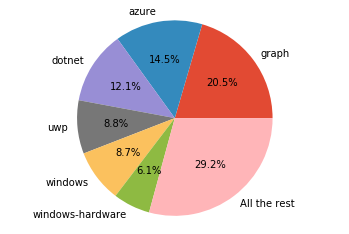

In [68]:
dictionary = level2_stats.to_dict()
threshold = 500

import itertools
newdic={}
for key, group in itertools.groupby(dictionary, lambda k: 'All the rest' if (dictionary[k]<threshold) else k):
    newdic[key] = sum([dictionary[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')

# fig.savefig('name.eps', bbox_inches='tight',format='eps', dpi=1200)
# fig.savefig('name.png', bbox_inches='tight',format='png', dpi=1200, transparent=True)
# fig.show()

## How many are related to Azure?

In [70]:
level2_stats['azure']

2322

## Dividing into the layer 3

In [183]:
df['level3'] = df['url'].apply(lambda x: x.split('/')[5] if len(x.split('/'))>6 else 'N.A.')

In [98]:
level3_stats = df['level3'].value_counts()
level3_stats

api                                                       6330
drivers                                                    934
devops                                                     505
win32                                                      458
uwp                                                        420
                                                          ... 
partner-security-requirements                                1
overview-major-services                                      1
permissions-reference#application-resource-permissions       1
delta-query-groups                                           1
use-case-information-protection                              1
Name: level3, Length: 992, dtype: int64

Text(0.5, 1.0, 'Azure topics (aggregating >50 entries)')

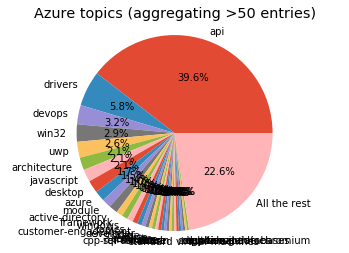

In [99]:
# fig = plt.figure(figsize=(5, 15))
# ax = plt.subplot2grid((1,1), (0,0))
# ax.set_title('Title')
# ax.set_ylim(min,max)
# ax.set_xlim(min,max)

dictionary = level3_stats.to_dict()
threshold = 50

import itertools
newdic={}
for key, group in itertools.groupby(dictionary, lambda k: 'All the rest' if (dictionary[k]<threshold) else k):
    newdic[key] = sum([dictionary[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
ax.set_title('Azure topics (aggregating >50 entries)')

# fig.savefig('name.eps', bbox_inches='tight',format='eps', dpi=1200)
# fig.savefig('name.png', bbox_inches='tight',format='png', dpi=1200, transparent=True)
# fig.show()

## How many are related to Azure Active Directory?

In [100]:
level3_stats['active-directory']

230

## Level4

In [212]:
df['level4'] = df['url'].apply(lambda x: x.split('/')[6] if len(x.split('/'))>7 else 'N.A.')

In [126]:
level4_stats = df['level4'].value_counts()
level4_stats

resources                                                                                       2177
ddi                                                                                              668
api                                                                                              513
reference                                                                                        365
                                                                                                 224
                                                                                                ... 
intune-onboarding-deviceappmanagement-syncmicrosoftstoreforbusinessapps?view=graph-rest-beta       1
customer-service-insights                                                                          1
log-flow.md                                                                                        1
windows-forms-mfc-programming-differences                                                  

## (In general) How many are related to "Advanced Threat Protection" or "ATP"?

In [209]:
print(stats_atp['url'][4974])
print(stats_atp['url'][4978])
print(stats_atp['url'][4979])

https://docs.microsoft.com/en-us/office365/servicedescriptions/office-365-advanced-threat-protection-service-description#feature-availability-across-advanced-threat-protection-atp-plans
https://docs.microsoft.com/en-us/office365/servicedescriptions/office-365-advanced-threat-protection-service-description#office-365-advanced-threat-protection-atp-availability
https://docs.microsoft.com/en-us/office365/servicedescriptions/office-365-advanced-threat-protection-service-description#whats-new-in-office-365-advanced-threat-protection-atp


In [219]:
df['level3'] = df['url'].apply(lambda x: x.split('/')[5] if len(x.split('/'))>5 else 'N.A.')
df['level4'] = df['url'].apply(lambda x: x.split('/')[6] if len(x.split('/'))>6 else 'N.A.')
stats_atp = df[df['url'].str.contains('atp|advanced-threat-protection')]
print(len(stats_atp))
stats_atp

42


,url,level2,level3,level4
425,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,office-365-security
1297,https://docs.microsoft.com/en-us/azure-advance...,azure-advanced-threat-protection,what-is-atp,N.A.
1298,https://docs.microsoft.com/en-us/azure-advance...,azure-advanced-threat-protection,atp-architecture,N.A.
1299,https://docs.microsoft.com/en-us/office365/ser...,office365,servicedescriptions,office-365-advanced-threat-protection-service-...
1300,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection
1301,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection
2178,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources
3389,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources
3390,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources
3782,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources


In [192]:
stats_atp['level2'].value_counts()

microsoft-365                       14
windows                              7
azure-advanced-threat-protection     5
office365                            5
graph                                5
dotnet                               3
powershell                           2
office                               1
Name: level2, dtype: int64

## The following code came from https://github.com/NinaWie/sunburst on shows how to plot a Sunburst

In [110]:
colour_list = [[0.733, 0.467, 0.518], [0.596, 1.0, 0.322], [0.88, 0.66, 0.795], [0.857, 0.524, 0.531], [0.52, 0.508, 0.61], [0.059, 0.812, 0.753], [0.902, 0.686, 0.725], [0.99, 0.99, 0.6], [0.517, 0.778, 0.821], [0.473, 0.778, 0.406], [0.565, 0.984, 0.573], [0.72, 0.1, 0.657], [0.836, 0.977, 0.736], [0.746, 0.835, 0.83], [0.745, 0.6, 0.439], [0.49, 0.529, 0.725], [0.682, 0.537, 0.689], [0.561, 0.993, 0.936], [0.559, 0.367, 0.794], [0.265, 0.425, 0.825], [0.743, 0.241, 0.1], [0.684, 0.1, 0.327], [0.5, 0.8, 0.99], [0.571, 0.61, 0.292], [0.941, 0.725, 0.553], [0.682, 0.537, 0.689], [0.934, 0.558, 0.516], [0.741, 0.827, 0.576], [0.744, 0.932, 0.921], [0.998, 0.969, 0.942], [0.969, 0.612, 0.831], [0.5, 0.8, 0.99], [1.0, 0.1, 0.437], [0.552, 0.863, 0.908], [0.1, 0.492, 0.104], [0.815, 0.768, 0.763], [1.0, 0.576, 0.494], [0.937, 0.592, 0.031], [0.1, 0.782, 0.594], [0.934, 0.558, 0.516], [0.695, 0.541, 0.524], [0.569, 0.816, 0.796], [1.0, 0.859, 0.4], [0.3, 0.4, 0.7], [0.553, 0.835, 0.576], [0.522, 0.584, 0.882], [1.0, 0.898, 0.008], [0.516, 0.61, 0.524]]

In [134]:
def sunburst(nodes, dic, total=np.pi * 2, offset=0, level=0, ax=None, text_smaller=False):
    """
    Recursive function to make a sunburst plot with an arbitrary number of layers
    This function was only adapted by me, it is taken from stackoverflow (see link in readme)
    @param nodes: list containing classes and number of data for each class
    @param dic: colour dictionary (one RGB color list for each class)
    @param text_smaller: if the text should be split if it is too long.
    """
    ax = ax or plt.subplot(111, projection='polar')

    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [0.5], [np.pi *2], color="white")
        ax.text(0, 0, label, ha='center', va='center', fontsize=15)
        if text_smaller:
            sunburst(subnodes, dic, total=value, level=level + 1, ax=ax, text_smaller=True)
        else: 
            sunburst(subnodes, dic, total=value, level=level + 1, ax=ax)
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            labels.append(label)
            widths.append(value * d)
            # sunburst(subnodes, dic, total=total, offset=local_offset,
              #       level=level + 1, ax=ax)
            if text_smaller:
                sunburst(subnodes, dic, total=total, offset=local_offset,
                     level=level + 1, ax=ax, text_smaller=True)
            else: 
                sunburst(subnodes, dic, total=total, offset=local_offset, level=level + 1, ax=ax)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5

        rects = ax.bar(values, heights, widths, bottoms, linewidth=0,
                       edgecolor='white', align='edge')
   
        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            if text_smaller:
                if len(label)>18:
                    name = str(label).split(" ")
                    name.insert(-1,"\n")
                    new_label = " ".join(name)
                else: 
                    new_label = label
            else:
                new_label = label
            ax.text(x, y, new_label, rotation=rotation, ha='center', va='center', fontsize=15)
            try:
                rect.set_color(dic[label])
            except KeyError:
                pass

    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_axis_off()
        
def get_data_list(ebene1, ebene2, ebene3=np.array([])):
    """
    Creates correct format for the nodes parameter of the sunburst function
    possible to create a two or three layer sunburst plot
    parameters: columns of the csv for each layer (ebene1 is the innermost circle, ebene2 the second inner one etc.)
    """
    group_freq = stats.itemfreq(ebene1)
    data = []
    for i in group_freq:
        inner_list = []
        filtered_ebene2 = ebene2[np.where(ebene1==i[0])]
        for j in stats.itemfreq(filtered_ebene2):
            inner_inner_list = []
            if len(ebene3)>0:
                filtered_ebene3 = ebene3[np.where(ebene1==i[0])]
                for k in stats.itemfreq(filtered_ebene3[np.where(filtered_ebene2==j[0])]):
                    new_name = str(k[0])
                    inner_inner_list.append((new_name, k[1],[]))
            tup = (j[0], int(j[1]), inner_inner_list)
            # print(j[0].replace("\n", ""), "ratio of ", i[0].replace("\n", ""), ":", int(j[1])/float(int(i[1])))
            inner_list.append(tup)
        data.append((i[0],int(i[1]), inner_list))
        # print("\n ratio of ", i[0].replace("\n", ""), ":", int(i[1])/float(len(ebene1)), "\n")
        
    # for j in stats.itemfreq(ebene2):
        # print("\n ratio of ", j[0], ":", int(j[1])/float(len(ebene2)))

    data_final = [("ATP-related", len(ebene1), data)]
    
    return data_final

def get_colour_dic(ebene1, ebene2, ebene3=np.array([])):
    dic = {}
    colour_counter = 0
    for ebene in ["ebene1", "ebene2", "ebene3"]:
        for e in np.unique(eval(ebene)):
            dic[e] = colour_list[colour_counter]
            colour_counter+=1  
    return dic

def colour_dic_inner(group, klasse, methode=np.array([])):
    dic = {}
    colour_counter = 0
    for e in np.unique(group):
        dic[e] = colour_list[colour_counter]
        colour_counter+=1
            
    new_dic = {}
    for g in np.unique(group):
        try:
            new_dic[g]=dic[g]
            old_g = g
        except KeyError:
            old_g = g.split(" ")
            del(old_g[-2])
            old_g = " ".join(old_g)
            new_dic[g]=dic[old_g]
        inds = np.where(group==g)[0]
        count = 0
        for k in np.unique(klasse[inds]):
            if count%2==0:
            # new_col = np.random.rand(3)*0.1
                col_for_name = np.asarray(dic[old_g])+0.08
            else:
                col_for_name = np.asarray(dic[old_g])-0.08
            count+=1
            col_for_name[col_for_name>1]=1
            col_for_name[col_for_name<0]=0
            # print(col_for_name)
            new_dic[k]= col_for_name # list(np.asarray(dic[old_g])*0.9)
            m_inds = np.where(klasse[inds]==k)
            count_2 = 0
            for m in np.unique(methode[inds][m_inds]):
                if count_2%2==0:
                    col_for_name = np.asarray(new_dic[k])+0.05
                else:
                    col_for_name = np.asarray(new_dic[k])-0.05
                col_for_name[col_for_name>1]=1
                col_for_name[col_for_name<0]=0
                count_2+=1
                new_dic[m]= col_for_name                
    return new_dic

In [220]:
first_level = stats_atp['level2'].values 
second_level = stats_atp['level3'].values
third_level = stats_atp['level4'].values

In [221]:
all_nans = []
for level in ["first_level", "second_level", "third_level"]:
    nans = np.where(pd.isnull(eval(level)))[0]
    for n in nans:
        if n not in all_nans:
            all_nans.append(n)
first_level = np.delete(first_level, all_nans)
second_level = np.delete(second_level, all_nans)
third_level = np.delete(third_level, all_nans)

In [222]:
from scipy import stats

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


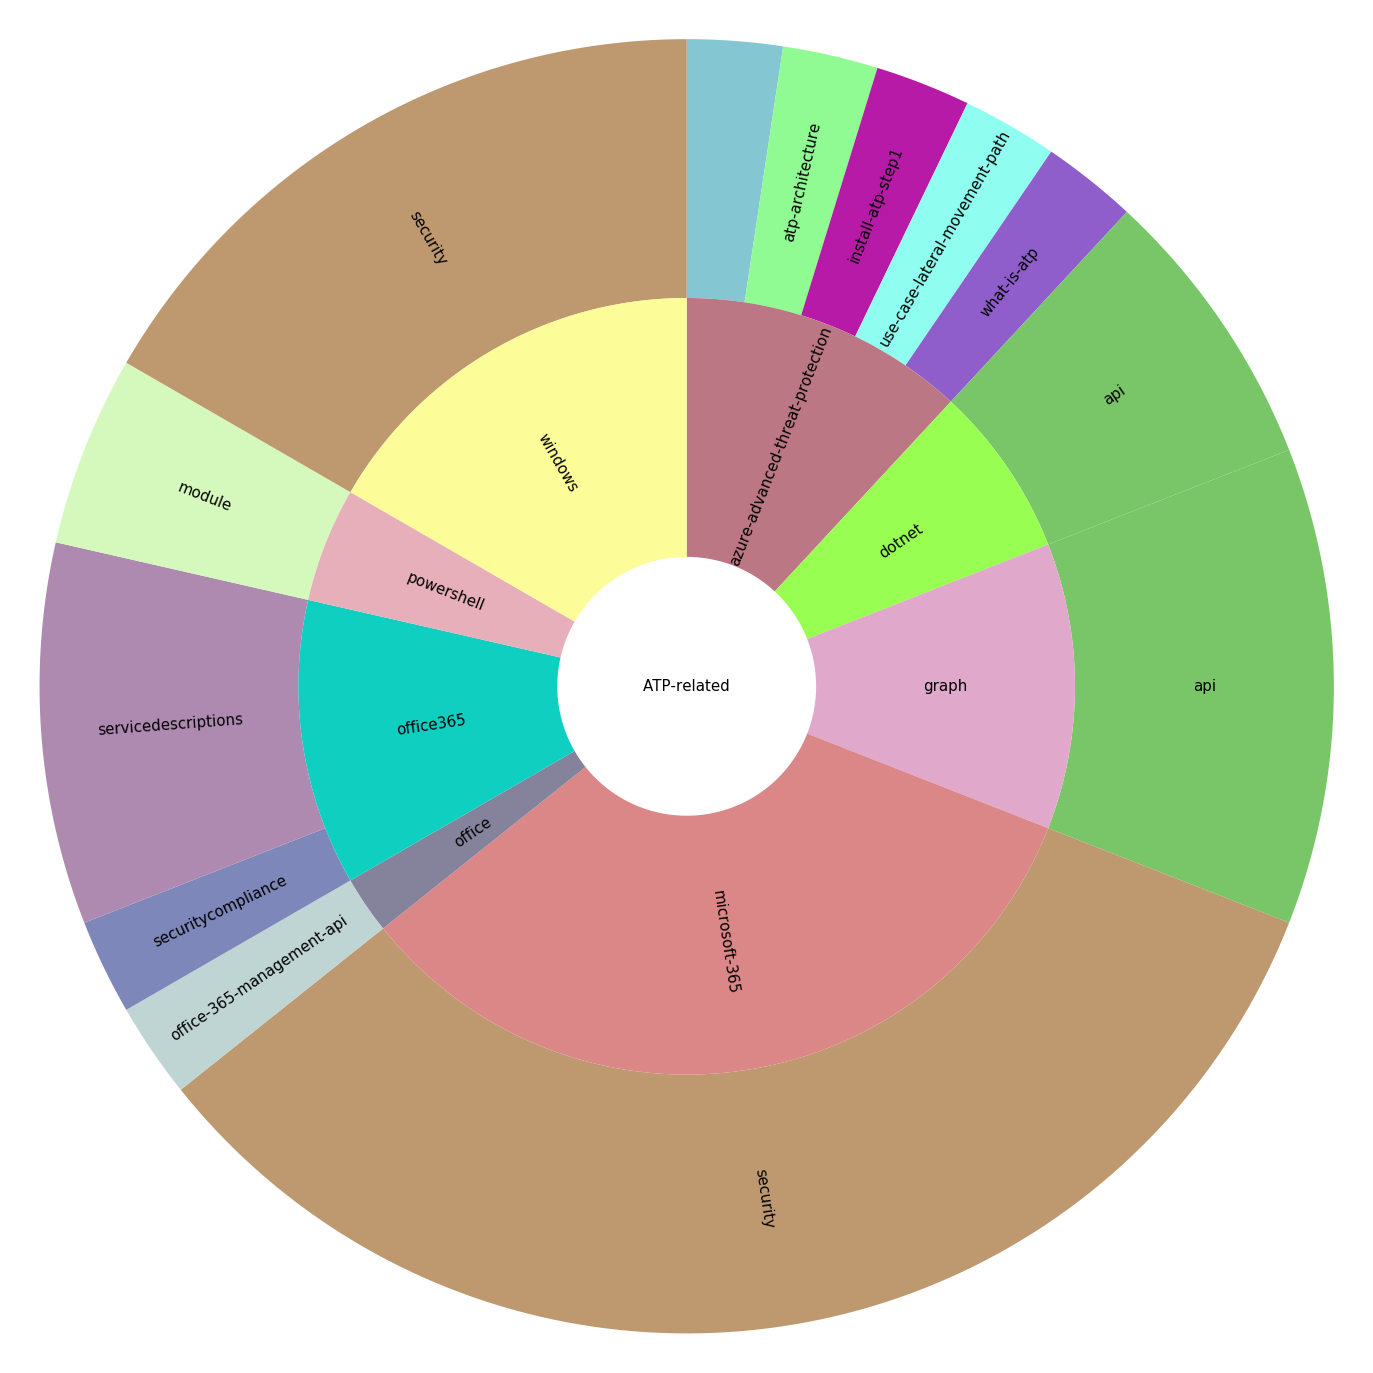

In [223]:
data_sunburst = get_data_list(first_level, second_level)
#                               , third_level)
dic = get_colour_dic(first_level, second_level, third_level)

plt.figure(figsize = (25,25))
sunburst(data_sunburst, dic)
plt.show()

In [190]:
df.head()

,url,level2,level3,level4
0,https://docs.microsoft.com/en-us/,N.A.,N.A.,N.A.
1,https://docs.microsoft.com/en-us/learn/,learn,N.A.,N.A.
2,https://docs.microsoft.com/en-us/samples/browse/,samples,browse,N.A.
3,https://docs.microsoft.com/en-us/windows/,windows,N.A.,N.A.
4,https://docs.microsoft.com/en-us/azure/,azure,N.A.,N.A.
